Booth synthetic function:

GP ERM versus STP nu = 3 ERM (winner)

https://www.sfu.ca/~ssurjano/camel6.html

In [ ]:
pip install pyGPGO


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
### Import modules:

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import random
import warnings

from pyGPGO.logger import EventLogger
from pyGPGO.GPGO import GPGO
from pyGPGO.surrogates.GaussianProcess import GaussianProcess
from pyGPGO.surrogates.tStudentProcess import tStudentProcess, logpdf
from pyGPGO.acquisition import Acquisition
from pyGPGO.covfunc import squaredExponential

from collections import OrderedDict
from joblib import Parallel, delayed
from numpy.linalg import slogdet, inv, cholesky, solve
from scipy.optimize import minimize
from scipy.spatial.distance import cdist
from scipy.special import gamma
from scipy.stats import norm, t
from matplotlib.pyplot import rc

rc('text', usetex=False)
plt.rcParams['text.latex.preamble']=[r'\usepackage{amsmath}']
plt.rcParams['text.latex.preamble'] = [r'\boldmath']

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UserWarning)


In [ ]:
### Inputs:

obj_func = 'Booth'
n_test = 500 # test points
df = 3 # nu

util_gp = 'RegretMinimized'
util_stp = 'tRegretMinimized'
n_init = 5 # random initialisations

cov_func = squaredExponential()
hyperOpt = True


In [ ]:
### Objective function:

if obj_func == 'Booth':
    
    # True y bounds:
    y_lb = 0
    operator = -1 # targets global minimum 
    y_global_orig = y_lb * operator # targets global minimum
            
# Constraints:
    lb = -10 
    ub = +10

# Input array dimension(s):
    dim = 2

# 2-D inputs' parameter bounds:
    param = {'x1_training': ('cont', [lb, ub]),
             'x2_training': ('cont', [lb, ub])}
    
# Test data:
    x1_test = np.linspace(lb, ub, n_test)
    x2_test = np.linspace(lb, ub, n_test)
    Xstar_d = np.column_stack((x1_test, x2_test))

    def f_syn_polarity(x1_training, x2_training):
        return operator * ( (x1_training + 2 * x2_training -7) ** 2 +
                                 (2 * x1_training + x2_training -5) ** 2
                            )
    

In [ ]:
max_iter = dim * 10  # iterations of Bayesian optimisation

In [ ]:
### Cumulative Regret Calculator:

def min_max_array(x):
    new_list = []
    for i, num in enumerate(x):
            new_list.append(np.min(x[0:i+1]))
    return new_list


In [ ]:
### Set-seeds:

run_num_1 = 1
run_num_2 = 2
run_num_3 = 3
run_num_4 = 4
run_num_5 = 5
run_num_6 = 6
run_num_7 = 7
run_num_8 = 8
run_num_9 = 9
run_num_10 = 10
run_num_11 = 11
run_num_12 = 12
run_num_13 = 13
run_num_14 = 14
run_num_15 = 15
run_num_16 = 16
run_num_17 = 17
run_num_18 = 18
run_num_19 = 19
run_num_20 = 20


In [ ]:
### Acquisition function - ERM:

class Acquisition_new(Acquisition):    
    def __init__(self, mode, eps=1e-06, **params):
        
        self.params = params
        self.eps = eps

        mode_dict = {
            'RegretMinimized': self.RegretMinimized,
            'tRegretMinimized': self.tRegretMinimized
        }

        self.f = mode_dict[mode]
   
    def RegretMinimized(self, tau, mean, std):
        
        z = (mean - y_global_orig - self.eps) / (std + self.eps)
        return z * (std + self.eps) * norm.cdf(z) + (std + self.eps) * norm.pdf(z)[0]
    
    def tRegretMinimized(self, tau, mean, std, nu=3.0):
        
        gamma = (mean - y_global_orig - self.eps) / (std + self.eps)
        return gamma * (std + self.eps) * t.cdf(gamma, df=nu) + (std + self.eps) * (nu + gamma ** 2)/(nu - 1) * t.pdf(gamma, df=nu)
    

In [ ]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 1

np.random.seed(run_num_1)
surrogate_gp_1 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_1 = GPGO(surrogate_gp_1, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_1.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-1.65955991  4.40648987]. 	  -15.332210716052247 	 -15.332210716052247
init   	 [-9.9977125  -3.95334855]. 	  -1458.2611077633842 	 -15.332210716052247
init   	 [-7.06488218 -8.1532281 ]. 	  -1666.779874000304 	 -15.332210716052247
init   	 [-6.27479577 -3.08878546]. 	  -804.3371752309802 	 -15.332210716052247
init   	 [-2.06465052  0.77633468]. 	  -126.2019077328938 	 -15.332210716052247
1      	 [ 7.89213327 -8.29911577]. 	  -252.857497365554 	 -15.332210716052247
2      	 [-9.9919595   9.53518298]. 	  -242.98321813982525 	 -15.332210716052247
3      	 [7.18978642 1.17033102]. 	  -117.70364068852723 	 -15.332210716052247
4      	 [4.33858003 9.7465235 ]. 	  -463.4989487714922 	 -15.332210716052247
5      	 [ 0.5706698  -6.98431203]. 	  -533.6465890758802 	 -15.332210716052247
6      	 [-3.26508003  9.83890024]. 	  -91.45966603357121 	 -15.332210716052247
7      	 [-7.69580028  3.39897418]. 	  -351.1254156566114 	 -15

In [ ]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 2

np.random.seed(run_num_2)
surrogate_gp_2 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_2 = GPGO(surrogate_gp_2, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_2.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-1.28010196 -9.48147536]. 	  -1032.6027521517153 	 -92.40504507724606
init   	 [ 0.99324956 -1.29355215]. 	  -92.40504507724606 	 -92.40504507724606
init   	 [-1.59264396 -3.39330358]. 	  -370.5851459944721 	 -92.40504507724606
init   	 [-5.90702732  2.38541933]. 	  -274.38308294748543 	 -92.40504507724606
init   	 [-4.00690653 -4.6634545 ]. 	  -725.9498417670716 	 -92.40504507724606
1      	 [1.68621527 8.57743132]. 	  -188.51170566577463 	 -92.40504507724606
2      	 [ 9.60970158 -5.07492822]. 	  -140.47535724819224 	 -92.40504507724606
3      	 [9.34706604 6.31959097]. 	  -625.1367393483031 	 -92.40504507724606
4      	 [-9.65718476  8.95249935]. 	  -237.5440944387729 	 -92.40504507724606
5      	 [-10. -10.]. 	  -2594.0 	 -92.40504507724606
6      	 [  5.01619566 -10.        ]. 	  -507.9647890168953 	 -92.40504507724606
7      	 [-10.          -2.68841492]. 	  -1267.3708349522706 	 -92.40504507724606
8      	 [6.86

In [ ]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 3

np.random.seed(run_num_3)
surrogate_gp_3 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_3 = GPGO(surrogate_gp_3, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_3.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [1.01595805 4.16295645]. 	  -6.912079999083602 	 -6.912079999083602
init   	 [-4.18190522  0.2165521 ]. 	  -288.3871250813255 	 -6.912079999083602
init   	 [7.85893909 7.92586178]. 	  -626.8352854305291 	 -6.912079999083602
init   	 [-7.48829379 -5.85514244]. 	  -1353.6437998345716 	 -6.912079999083602
init   	 [-8.97065593 -1.18380313]. 	  -918.3130335940459 	 -6.912079999083602
1      	 [ 5.60629529 -3.87272935]. 	  -88.9992584872525 	 -6.912079999083602
2      	 [-4.10613003  9.76225506]. 	  -82.77165774543313 	 -6.912079999083602
3      	 [-0.02389563 -8.59761974]. 	  -772.7637467675567 	 -6.912079999083602
4      	 [-9.54603235  6.06474326]. 	  -344.4901950398001 	 -6.912079999083602
5      	 [7.93008815 1.70161022]. 	  -176.57604422682718 	 -6.912079999083602
6      	 [2.29603694 9.59291435]. 	  -294.08844053707884 	 -6.912079999083602
7      	 [  7.27324069 -10.        ]. 	  -389.3507120599718 	 -6.91207999908360

In [ ]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 4

np.random.seed(run_num_4)
surrogate_gp_4 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_4 = GPGO(surrogate_gp_4, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_4.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [9.34059678 0.94464498]. 	  -231.80709501196006 	 -215.08077877054313
init   	 [9.4536872  4.29631987]. 	  -453.3958241553961 	 -215.08077877054313
init   	 [ 3.95457649 -5.67821009]. 	  -215.08077877054313 	 -215.08077877054313
init   	 [ 9.5254891 -9.8753949]. 	  -314.14647993232734 	 -215.08077877054313
init   	 [-4.94035275 -1.30416935]. 	  -473.61459720928724 	 -215.08077877054313
1      	 [-6.35109191  8.36766078]. 	  -98.58633065034904 	 -98.58633065034904
2      	 [-3.51156823 -9.76157344]. 	  -1376.6576971918041 	 -98.58633065034904
3      	 [1.25957276 3.96856025]. 	  -7.03872971343211 	 -7.03872971343211
4      	 [-10.          -5.32766753]. 	  -1684.5849756698399 	 -7.03872971343211
5      	 [5.11629974 8.62066083]. 	  -427.76935659761193 	 -7.03872971343211
6      	 [-9.40278396  3.43389327]. 	  -505.9213033265296 	 -7.03872971343211
7      	 [-0.73350956 10.        ]. 	  -162.94874179324955 	 -7.0387297134

In [ ]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 5

np.random.seed(run_num_5)
surrogate_gp_5 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_5 = GPGO(surrogate_gp_5, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_5.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-5.56013658  7.41464612]. 	  -80.93700948496809 	 -18.053107398965345
init   	 [-5.86561689  8.37221816]. 	  -84.91838238990834 	 -18.053107398965345
init   	 [-0.23177622  2.23487726]. 	  -18.053107398965345 	 -18.053107398965345
init   	 [5.31815713 0.36835976]. 	  -36.94936820355582 	 -18.053107398965345
init   	 [-4.06398997 -6.24557543]. 	  -930.179306576812 	 -18.053107398965345
1      	 [9.27861058 9.20453431]. 	  -946.0775823883291 	 -18.053107398965345
2      	 [ 7.74805944 -8.8322849 ]. 	  -288.93666643469464 	 -18.053107398965345
3      	 [-9.74982643  0.67357358]. 	  -804.9245830307556 	 -18.053107398965345
4      	 [2.14629555 7.87248894]. 	  -169.9582089194134 	 -18.053107398965345
5      	 [10.         -3.05127915]. 	  -152.39779796661128 	 -18.053107398965345
6      	 [  1.50646383 -10.        ]. 	  -793.6102895948953 	 -18.053107398965345
7      	 [-10. -10.]. 	  -2594.0 	 -18.053107398965345
8      	 

In [ ]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 6

np.random.seed(run_num_6)
surrogate_gp_6 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_6 = GPGO(surrogate_gp_6, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_6.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [ 7.85720303 -3.36040389]. 	  -88.46320859272592 	 -88.46320859272592
init   	 [ 6.42458246 -9.16606749]. 	  -359.2297742730208 	 -88.46320859272592
init   	 [-7.8468664   1.90104128]. 	  -475.1525044254979 	 -88.46320859272592
init   	 [ 0.59634724 -1.62385143]. 	  -122.64613090496854 	 -88.46320859272592
init   	 [-3.29184301  2.45038864]. 	  -112.48071079498652 	 -88.46320859272592
1      	 [4.34664291 8.74699069]. 	  -375.00460929454164 	 -88.46320859272592
2      	 [-9.22684845 -9.49630667]. 	  -2326.1132231548063 	 -88.46320859272592
3      	 [-8.76081661 10.        ]. 	  -174.7619743091263 	 -88.46320859272592
4      	 [-1.55685099 -9.08574799]. 	  -1010.2256105326449 	 -88.46320859272592
5      	 [6.79482567 2.72096441]. 	  -155.35362623680876 	 -88.46320859272592
6      	 [-5.25387664 -3.6795998 ]. 	  -752.8272774860159 	 -88.46320859272592
7      	 [-2.44912052  8.1523742 ]. 	  -50.04768473790241 	 -50.0476847

In [ ]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 7

np.random.seed(run_num_7)
surrogate_gp_7 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_7 = GPGO(surrogate_gp_7, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_7.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-8.47383421  5.59837584]. 	  -285.59280278210764 	 -9.465549861932052
init   	 [-1.23181537  4.46930356]. 	  -9.465549861932052 	 -9.465549861932052
init   	 [9.55979024 0.76991741]. 	  -238.50407296157155 	 -9.465549861932052
init   	 [ 0.02240927 -8.55897733]. 	  -763.2277954619568 	 -9.465549861932052
init   	 [-4.63122040e+00 -2.34998349e-03]. 	  -338.87889871968287 	 -9.465549861932052
1      	 [ 8.12846538 -6.39096762]. 	  -159.48095689562982 	 -9.465549861932052
2      	 [-8.14836394 -7.87881564]. 	  -1806.3928796337154 	 -9.465549861932052
3      	 [ 3.94503425 -1.77941795]. 	  -44.97591698287262 	 -9.465549861932052
4      	 [5.38017998 9.74494226]. 	  -559.7536018014915 	 -9.465549861932052
5      	 [-2.29861155  9.517276  ]. 	  -94.79492791083172 	 -9.465549861932052
6      	 [3.99232419 3.91861682]. 	  -70.97969920052653 	 -9.465549861932052
7      	 [-9.27988497 -2.4076281 ]. 	  -1119.310742075028 	 -9.465

In [ ]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 8

np.random.seed(run_num_8)
surrogate_gp_8 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_8 = GPGO(surrogate_gp_8, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_8.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [7.46858806 9.37081326]. 	  -741.8307972128058 	 -75.39770051777191
init   	 [7.3838908  0.61711383]. 	  -110.46436066448925 	 -75.39770051777191
init   	 [-5.34543344 -9.77202391]. 	  -1665.297823285088 	 -75.39770051777191
init   	 [-1.39062363 -1.9529728 ]. 	  -245.96065521704543 	 -75.39770051777191
init   	 [ 0.45349343 -0.43216408]. 	  -75.39770051777191 	 -75.39770051777191
1      	 [ 9.69498875 -9.42535902]. 	  -285.65502563735186 	 -75.39770051777191
2      	 [-9.2726808   3.70136455]. 	  -472.4602618219628 	 -75.39770051777191
3      	 [-1.00193888  8.6865702 ]. 	  -90.65087164448859 	 -75.39770051777191
4      	 [ 1.67218025 -9.53304568]. 	  -720.2495757818853 	 -75.39770051777191
5      	 [-8.50598524 -3.43325463]. 	  -1147.9879900256267 	 -75.39770051777191
6      	 [-7.90135431  9.65965498]. 	  -143.68597661229123 	 -75.39770051777191
7      	 [3.23947442 4.78655133]. 	  -73.04254447506628 	 -73.0425444750

In [ ]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 9

np.random.seed(run_num_9)
surrogate_gp_9 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_9 = GPGO(surrogate_gp_9, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_9.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-9.79251692  0.03749184]. 	  -882.0577358281939 	 -526.7340464177141
init   	 [-0.08453414 -7.32340942]. 	  -628.3137012668271 	 -526.7340464177141
init   	 [-7.15777829 -5.62882649]. 	  -1268.1663931377898 	 -526.7340464177141
init   	 [-1.62983639 -5.03797663]. 	  -526.7340464177141 	 -526.7340464177141
init   	 [-8.31880698 -3.0900272 ]. 	  -1073.657277368356 	 -526.7340464177141
1      	 [6.0747954  9.66718496]. 	  -621.7013152481403 	 -526.7340464177141
2      	 [-5.63523324  8.6681764 ]. 	  -79.89533946098936 	 -79.89533946098936
3      	 [6.41415507 0.47363479]. 	  -69.0529172025068 	 -69.0529172025068
4      	 [ 8.47031062 -7.8160561 ]. 	  -217.56866185243504 	 -69.0529172025068
5      	 [-0.96410885  2.4157208 ]. 	  -30.17623227066845 	 -30.17623227066845
6      	 [10.          4.98566428]. 	  -567.6821410858545 	 -30.17623227066845
7      	 [-0.06968527 10.        ]. 	  -190.8187575989455 	 -30.17623227066845

In [ ]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 10

np.random.seed(run_num_10)
surrogate_gp_10 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_10 = GPGO(surrogate_gp_10, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_10.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [ 5.42641287 -9.58496101]. 	  -444.22200604720473 	 -59.96573403226766
init   	 [2.6729647  4.97607765]. 	  -59.96573403226766 	 -59.96573403226766
init   	 [-0.02985975 -5.50406709]. 	  -436.96281238949786 	 -59.96573403226766
init   	 [-6.0387427   5.21061424]. 	  -147.67401193720747 	 -59.96573403226766
init   	 [-6.61778327 -8.23320372]. 	  -1605.6543289416081 	 -59.96573403226766
1      	 [ 7.13700605 -2.96694721]. 	  -73.38298230374753 	 -59.96573403226766
2      	 [-3.99578777 -2.07116242]. 	  -456.04852829488834 	 -59.96573403226766
3      	 [9.66850943 7.44610645]. 	  -782.8835171505189 	 -59.96573403226766
4      	 [-1.89192077  9.96155329]. 	  -123.07406534635732 	 -59.96573403226766
5      	 [-10.  10.]. 	  -234.0 	 -59.96573403226766
6      	 [-9.92966549 -0.63209917]. 	  -980.8296913241313 	 -59.96573403226766
7      	 [ 6.41222729 -3.82625159]. 	  -83.88777389359075 	 -59.96573403226766
8      	 [10.     

In [ ]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 11

np.random.seed(run_num_11)
surrogate_gp_11 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_11 = GPGO(surrogate_gp_11, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_11.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-6.39460622 -9.61049517]. 	  -1814.521116554919 	 -5.483030044782123
init   	 [-0.73562947  4.49867858]. 	  -5.483030044782123 	 -5.483030044782123
init   	 [-1.59592791 -0.29145804]. 	  -156.21779076814232 	 -5.483030044782123
init   	 [-9.74438371 -0.25256785]. 	  -909.6795910034871 	 -5.483030044782123
init   	 [8.83613305 7.01590179]. 	  -639.4153671589368 	 -5.483030044782123
1      	 [ 1.99086793 -8.88652641]. 	  -617.1328244256196 	 -5.483030044782123
2      	 [ 8.49867098 -2.6935854 ]. 	  -101.68031686635348 	 -5.483030044782123
3      	 [-9.67220846  8.15346749]. 	  -262.2802677959167 	 -5.483030044782123
4      	 [-3.28035964  9.86584116]. 	  -92.20011216193278 	 -5.483030044782123
5      	 [10.         -8.95360371]. 	  -258.7837409558237 	 -5.483030044782123
6      	 [3.07157833 8.17544235]. 	  -241.15387544570484 	 -5.483030044782123
7      	 [5.67257636 2.25643218]. 	  -84.13429558159504 	 -5.4830300447821

In [ ]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 12

np.random.seed(run_num_12)
surrogate_gp_12 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_12 = GPGO(surrogate_gp_12, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_12.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-6.91674315  4.80099393]. 	  -215.5279554685742 	 -189.34864056663108
init   	 [-4.7336997   0.67478787]. 	  -298.0661631184378 	 -189.34864056663108
init   	 [-9.70850075  8.37494016]. 	  -257.3494442600599 	 -189.34864056663108
init   	 [ 8.01429708 -9.33157145]. 	  -314.3616446198572 	 -189.34864056663108
init   	 [ 9.13898673 -7.25581357]. 	  -189.34864056663108 	 -189.34864056663108
1      	 [4.66251955 4.05244711]. 	  -103.44533669968575 	 -103.44533669968575
2      	 [-2.7912422  -9.90274624]. 	  -1295.6113783791748 	 -103.44533669968575
3      	 [-9.21340032 -6.0168505 ]. 	  -1664.8273238367929 	 -103.44533669968575
4      	 [ 2.3786551  -3.91501994]. 	  -172.32353345385013 	 -103.44533669968575
5      	 [-1.18444518 10.        ]. 	  -146.53007379669512 	 -103.44533669968575
6      	 [7.88778153 9.83567093]. 	  -847.5005207053736 	 -103.44533669968575
7      	 [ 9.21400871 -1.31059375]. 	  -146.99775113048884 	

In [ ]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 13

np.random.seed(run_num_13)
surrogate_gp_13 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_13 = GPGO(surrogate_gp_13, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_13.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [ 5.55404821 -5.2491756 ]. 	  -143.4041188295949 	 -48.27231948835582
init   	 [6.48557065 9.31498396]. 	  -626.9828646177026 	 -48.27231948835582
init   	 [ 9.45202228 -0.93101505]. 	  -168.64758529203058 	 -48.27231948835582
init   	 [2.18084926 5.51053029]. 	  -62.202299160666314 	 -48.27231948835582
init   	 [2.8322669  4.44036459]. 	  -48.27231948835582 	 -48.27231948835582
1      	 [-8.69830926  2.59657998]. 	  -502.3996877395562 	 -48.27231948835582
2      	 [-9.70426529 -6.97038172]. 	  -1923.7539236093762 	 -48.27231948835582
3      	 [-5.15731386  9.98552473]. 	  -89.45380260888167 	 -48.27231948835582
4      	 [-2.60249668 -3.02672252]. 	  -420.18681678275664 	 -48.27231948835582
5      	 [  0.17519245 -10.        ]. 	  -934.1815222070983 	 -48.27231948835582
6      	 [ 10. -10.]. 	  -314.0 	 -48.27231948835582
7      	 [-2.78111506  2.93106418]. 	  -73.59315063302546 	 -48.27231948835582
8      	 [10.       

In [ ]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 14

np.random.seed(run_num_14)
surrogate_gp_14 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_14 = GPGO(surrogate_gp_14, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_14.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [0.27886688 5.46330104]. 	  -18.728481209446468 	 -18.728481209446468
init   	 [ 7.40855371 -9.83906103]. 	  -371.31674613664467 	 -18.728481209446468
init   	 [-3.80528149  9.15207479]. 	  -68.19416312981014 	 -18.728481209446468
init   	 [ 0.26233425 -3.6343115 ]. 	  -261.94243460125864 	 -18.728481209446468
init   	 [ 0.78399875 -5.57490115]. 	  -382.6954465291845 	 -18.728481209446468
1      	 [ 9.82765998 -0.95725402]. 	  -188.47085669712428 	 -18.728481209446468
2      	 [-9.49686071  0.24522809]. 	  -820.1959219945822 	 -18.728481209446468
3      	 [7.57694019 9.97332605]. 	  -826.3222786724527 	 -18.728481209446468
4      	 [-9.03618313 -7.68347095]. 	  -1932.0777854153525 	 -18.728481209446468
5      	 [-10.           9.03068831]. 	  -256.14543615761806 	 -18.728481209446468
6      	 [5.50445275 3.64757964]. 	  -126.88320526480943 	 -18.728481209446468
7      	 [-3.37759836  1.13538512]. 	  -178.50106098975192 

In [ ]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 15

np.random.seed(run_num_15)
surrogate_gp_15 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_15 = GPGO(surrogate_gp_15, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_15.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [ 6.97635395 -6.4220815 ]. 	  -171.98457986923216 	 -171.98457986923216
init   	 [-8.91273571 -2.76923108]. 	  -1115.2426864421157 	 -171.98457986923216
init   	 [-4.49198143  0.6000045 ]. 	  -285.0550378664367 	 -171.98457986923216
init   	 [-3.88162169 -3.91051282]. 	  -627.8031621427792 	 -171.98457986923216
init   	 [-7.76517448 -5.00201972]. 	  -1265.415808453521 	 -171.98457986923216
1      	 [-1.08003705  9.49213271]. 	  -124.34069392980017 	 -124.34069392980017
2      	 [9.57165948 8.0143824 ]. 	  -836.9395128340627 	 -124.34069392980017
3      	 [-9.4900374   7.95094916]. 	  -257.2787764673604 	 -124.34069392980017
4      	 [4.92194164 0.71352053]. 	  -31.308560635871885 	 -31.308560635871885
5      	 [-1.56932732 -9.61854474]. 	  -1088.514944881611 	 -31.308560635871885
6      	 [10.        -1.3766669]. 	  -185.65604885033662 	 -31.308560635871885
7      	 [3.69754277 6.16901916]. 	  -154.98561471887243 	 -31.

In [ ]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 16

np.random.seed(run_num_16)
surrogate_gp_16 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_16 = GPGO(surrogate_gp_16, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_16.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-5.53417842  0.46326683]. 	  -378.2562509858209 	 -182.86095429406956
init   	 [ 1.01402913 -9.087961  ]. 	  -729.2383206820605 	 -182.86095429406956
init   	 [-2.78542329 -5.53838117]. 	  -694.7380078426447 	 -182.86095429406956
init   	 [ 3.77452324 -6.7253715 ]. 	  -295.53799633399245 	 -182.86095429406956
init   	 [-8.59350266  8.8202172 ]. 	  -182.86095429406956 	 -182.86095429406956
1      	 [4.18505664 9.44091052]. 	  -422.2668893394708 	 -182.86095429406956
2      	 [9.89125625 1.7559367 ]. 	  -314.52037100721634 	 -182.86095429406956
3      	 [2.18426858 2.22636686]. 	  -2.675486154710408 	 -2.675486154710408
4      	 [ 10. -10.]. 	  -314.0 	 -2.675486154710408
5      	 [-9.09808001 -7.63455354]. 	  -1934.4333252473098 	 -2.675486154710408
6      	 [-2.24973916  7.07669009]. 	  -29.915598119614753 	 -2.675486154710408
7      	 [10.          7.75147018]. 	  -859.9881970451265 	 -2.675486154710408
8      	 [ 9.2

In [ ]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 17

np.random.seed(run_num_17)
surrogate_gp_17 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_17 = GPGO(surrogate_gp_17, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_17.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-4.10669995  0.61173511]. 	  -256.4801849765532 	 -5.553508838684786
init   	 [-6.16958426 -8.64199284]. 	  -1602.4406672130797 	 -5.553508838684786
init   	 [5.7397092  3.12667044]. 	  -117.20749172761734 	 -5.553508838684786
init   	 [2.75041792 1.51205788]. 	  -5.553508838684786 	 -5.553508838684786
init   	 [-9.21874168 -2.84372791]. 	  -1170.583554210921 	 -5.553508838684786
1      	 [-8.64042543  9.21575513]. 	  -178.4868811929342 	 -5.553508838684786
2      	 [ 6.7462854 -7.9395603]. 	  -260.5741923041236 	 -5.553508838684786
3      	 [1.34606708 9.29064876]. 	  -215.87601270651436 	 -5.553508838684786
4      	 [10. 10.]. 	  -1154.0 	 -5.553508838684786
5      	 [ 0.63958575 -4.37817023]. 	  -294.1100536589828 	 -5.553508838684786
6      	 [10.         -1.72842097]. 	  -176.34351460934525 	 -5.553508838684786
7      	 [-10.           3.47835646]. 	  -564.0487563722163 	 -5.553508838684786
8      	 [ 2.04141211 -

In [ ]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 18

np.random.seed(run_num_18)
surrogate_gp_18 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_18 = GPGO(surrogate_gp_18, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_18.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [3.00748483 0.10906747]. 	  -15.509405515253864 	 -15.509405515253864
init   	 [ 7.57202942 -6.36319549]. 	  -162.0234327224751 	 -15.509405515253864
init   	 [7.04466137 5.00272572]. 	  -299.59059770472754 	 -15.509405515253864
init   	 [3.32203335 9.75790897]. 	  -380.8425822546991 	 -15.509405515253864
init   	 [-4.86063155 -9.43388149]. 	  -1527.7052410059514 	 -15.509405515253864
1      	 [-6.1664519   4.28513481]. 	  -191.3691670751314 	 -15.509405515253864
2      	 [-2.80172142 -3.07436931]. 	  -441.4997205571668 	 -15.509405515253864
3      	 [-9.64708739 -3.80313768]. 	  -1377.6845719111288 	 -15.509405515253864
4      	 [ 2.24629728 -8.89018434]. 	  -596.0990672811774 	 -15.509405515253864
5      	 [-1.49416818  5.70232236]. 	  -13.696733687966551 	 -13.696733687966551
6      	 [10.         -0.95121054]. 	  -198.57316463237223 	 -13.696733687966551
7      	 [-9.82817592  9.4839131 ]. 	  -234.7810002870478 	 -1

In [ ]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 19

np.random.seed(run_num_19)
surrogate_gp_19 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_19 = GPGO(surrogate_gp_19, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_19.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-8.04932797  5.22499433]. 	  -273.1270544592675 	 -139.9227861892117
init   	 [-5.06124054 -7.23736625]. 	  -1204.1206373978957 	 -139.9227861892117
init   	 [-3.37106873 -8.3400087 ]. 	  -1135.0538557997047 	 -139.9227861892117
init   	 [3.43954163 6.13187596]. 	  -139.9227861892117 	 -139.9227861892117
init   	 [9.65483829 2.7132147 ]. 	  -355.08571481298065 	 -139.9227861892117
1      	 [ 9.42739537 -7.28680447]. 	  -190.6689475777885 	 -139.9227861892117
2      	 [ 2.60055404 -2.69333527]. 	  -101.97927260761645 	 -101.97927260761645
3      	 [10. 10.]. 	  -1154.0 	 -101.97927260761645
4      	 [-2.71532567 10.        ]. 	  -105.95998666648444 	 -101.97927260761645
5      	 [-2.25792871  1.57148588]. 	  -100.50573765289897 	 -100.50573765289897
6      	 [-10.          -2.43029515]. 	  -1230.3064998966677 	 -100.50573765289897
7      	 [  3.65746619 -10.        ]. 	  -603.934149315991 	 -100.50573765289897
8      	 

In [ ]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 20

np.random.seed(run_num_20)
surrogate_gp_20 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_20 = GPGO(surrogate_gp_20, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_20.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [1.76261602 7.95427456]. 	  -155.85777119682857 	 -155.85777119682857
init   	 [7.83061459 6.31674955]. 	  -469.53411882784934 	 -155.85777119682857
init   	 [-9.28220829  3.83515164]. 	  -463.4088031056881 	 -155.85777119682857
init   	 [-2.42638116  0.37021891]. 	  -165.36424127801376 	 -155.85777119682857
init   	 [ 3.15902931 -6.12299564]. 	  -281.877765303078 	 -155.85777119682857
1      	 [-9.80814458 -5.24853225]. 	  -1637.482001370834 	 -155.85777119682857
2      	 [-3.25901385 -9.8120118 ]. 	  -1347.9665117747802 	 -155.85777119682857
3      	 [ 9.98664637 -9.53306218]. 	  -288.14572114093755 	 -155.85777119682857
4      	 [ 9.76065736 -3.02050331]. 	  -143.02935426879236 	 -143.02935426879236
5      	 [4.17505925 1.04497344]. 	  -19.857049148444542 	 -19.857049148444542
6      	 [-3.60412233  9.77330264]. 	  -85.89694380096418 	 -19.857049148444542
7      	 [-9.96987748  9.08867018]. 	  -252.71485509923002 	 -

In [ ]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 1 

np.random.seed(run_num_1)
surrogate_stp_1 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_1 = GPGO(surrogate_stp_1, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_1.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-1.65955991  4.40648987]. 	  -15.332210716052247 	 -15.332210716052247
init   	 [-9.9977125  -3.95334855]. 	  -1458.2611077633842 	 -15.332210716052247
init   	 [-7.06488218 -8.1532281 ]. 	  -1666.779874000304 	 -15.332210716052247
init   	 [-6.27479577 -3.08878546]. 	  -804.3371752309802 	 -15.332210716052247
init   	 [-2.06465052  0.77633468]. 	  -126.2019077328938 	 -15.332210716052247
1      	 [ 7.89213327 -8.29911577]. 	  -252.857497365554 	 -15.332210716052247
2      	 [-9.9919595   9.53518298]. 	  -242.98321813982525 	 -15.332210716052247
3      	 [10. 10.]. 	  -1154.0 	 -15.332210716052247
4      	 [7.20473995 1.17807622]. 	  -118.65451445544127 	 -15.332210716052247
5      	 [ 0.5706698  -6.98431203]. 	  -533.6465890758802 	 -15.332210716052247
6      	 [ 2.84843116 10.        ]. 	  -365.5956333652869 	 -15.332210716052247
7      	 [-9.74061821  2.84159495]. 	  -590.5408038528917 	 -15.332210716052247
8      	

In [ ]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 2 

np.random.seed(run_num_2)
surrogate_stp_2 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_2 = GPGO(surrogate_stp_2, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_2.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-1.28010196 -9.48147536]. 	  -1032.6027521517153 	 -92.40504507724606
init   	 [ 0.99324956 -1.29355215]. 	  -92.40504507724606 	 -92.40504507724606
init   	 [-1.59264396 -3.39330358]. 	  -370.5851459944721 	 -92.40504507724606
init   	 [-5.90702732  2.38541933]. 	  -274.38308294748543 	 -92.40504507724606
init   	 [-4.00690653 -4.6634545 ]. 	  -725.9498417670716 	 -92.40504507724606
1      	 [-10.  10.]. 	  -234.0 	 -92.40504507724606
2      	 [ 10. -10.]. 	  -314.0 	 -92.40504507724606
3      	 [10. 10.]. 	  -1154.0 	 -92.40504507724606
4      	 [1.46671518 8.21043782]. 	  -156.28675034009555 	 -92.40504507724606
5      	 [ 9.4009129  -0.13193494]. 	  -191.4328691997528 	 -92.40504507724606
6      	 [-10. -10.]. 	  -2594.0 	 -92.40504507724606
7      	 [ 4.51851558 -6.31831615]. 	  -233.7617145733547 	 -92.40504507724606
8      	 [-10.          -2.26654844]. 	  -1207.1389245039386 	 -92.40504507724606
9      	 [-2.35

In [ ]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 3 

np.random.seed(run_num_3)
surrogate_stp_3 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_3 = GPGO(surrogate_stp_3, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_3.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [1.01595805 4.16295645]. 	  -6.912079999083602 	 -6.912079999083602
init   	 [-4.18190522  0.2165521 ]. 	  -288.3871250813255 	 -6.912079999083602
init   	 [7.85893909 7.92586178]. 	  -626.8352854305291 	 -6.912079999083602
init   	 [-7.48829379 -5.85514244]. 	  -1353.6437998345716 	 -6.912079999083602
init   	 [-8.97065593 -1.18380313]. 	  -918.3130335940459 	 -6.912079999083602
1      	 [ 5.60629529 -3.87272935]. 	  -88.9992584872525 	 -6.912079999083602
2      	 [-4.10613003  9.76225506]. 	  -82.77165774543313 	 -6.912079999083602
3      	 [  0.79887337 -10.        ]. 	  -866.1194292183426 	 -6.912079999083602
4      	 [ 10. -10.]. 	  -314.0 	 -6.912079999083602
5      	 [-10.           6.32784458]. 	  -367.52242456934016 	 -6.912079999083602
6      	 [8.27602814 2.54319598]. 	  -239.1565259787527 	 -6.912079999083602
7      	 [ 1.84133063 10.        ]. 	  -295.6537014878971 	 -6.912079999083602
8      	 [-1.29647629

In [ ]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 4 

np.random.seed(run_num_4)
surrogate_stp_4 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_4 = GPGO(surrogate_stp_4, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_4.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [9.34059678 0.94464498]. 	  -231.80709501196006 	 -215.08077877054313
init   	 [9.4536872  4.29631987]. 	  -453.3958241553961 	 -215.08077877054313
init   	 [ 3.95457649 -5.67821009]. 	  -215.08077877054313 	 -215.08077877054313
init   	 [ 9.5254891 -9.8753949]. 	  -314.14647993232734 	 -215.08077877054313
init   	 [-4.94035275 -1.30416935]. 	  -473.61459720928724 	 -215.08077877054313
1      	 [-10. -10.]. 	  -2594.0 	 -215.08077877054313
2      	 [-1.54688157  7.50124694]. 	  -42.026005803069296 	 -42.026005803069296
3      	 [-10.  10.]. 	  -234.0 	 -42.026005803069296
4      	 [ -2.20038978 -10.        ]. 	  -1229.0530107166069 	 -42.026005803069296
5      	 [2.64802424 0.93672381]. 	  -7.662829264577823 	 -7.662829264577823
6      	 [ 4.51111753 10.        ]. 	  -503.26231282207345 	 -7.662829264577823
7      	 [-6.73246671  4.28681146]. 	  -227.63281137318552 	 -7.662829264577823
8      	 [-10.          -3.9001334

In [ ]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 5 

np.random.seed(run_num_5)
surrogate_stp_5 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_5 = GPGO(surrogate_stp_5, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_5.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-5.56013658  7.41464612]. 	  -80.93700948496809 	 -18.053107398965345
init   	 [-5.86561689  8.37221816]. 	  -84.91838238990834 	 -18.053107398965345
init   	 [-0.23177622  2.23487726]. 	  -18.053107398965345 	 -18.053107398965345
init   	 [5.31815713 0.36835976]. 	  -36.94936820355582 	 -18.053107398965345
init   	 [-4.06398997 -6.24557543]. 	  -930.179306576812 	 -18.053107398965345
1      	 [9.27861058 9.20453431]. 	  -946.0775823883291 	 -18.053107398965345
2      	 [ 4.38925632 -9.93351357]. 	  -543.1342174137803 	 -18.053107398965345
3      	 [-9.74982643  0.67357358]. 	  -804.9245830307556 	 -18.053107398965345
4      	 [-10. -10.]. 	  -2594.0 	 -18.053107398965345
5      	 [ 1.9587712 10.       ]. 	  -303.2873982994657 	 -18.053107398965345
6      	 [ 9.61788195 -4.36004008]. 	  -134.76674392482536 	 -18.053107398965345
7      	 [ 1.88284724 -4.22190263]. 	  -213.66979005681594 	 -18.053107398965345
8      	 [1

In [ ]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 6 

np.random.seed(run_num_6)
surrogate_stp_6 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_6 = GPGO(surrogate_stp_6, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_6.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [ 7.85720303 -3.36040389]. 	  -88.46320859272592 	 -88.46320859272592
init   	 [ 6.42458246 -9.16606749]. 	  -359.2297742730208 	 -88.46320859272592
init   	 [-7.8468664   1.90104128]. 	  -475.1525044254979 	 -88.46320859272592
init   	 [ 0.59634724 -1.62385143]. 	  -122.64613090496854 	 -88.46320859272592
init   	 [-3.29184301  2.45038864]. 	  -112.48071079498652 	 -88.46320859272592
1      	 [4.34664291 8.74699069]. 	  -375.00460929454164 	 -88.46320859272592
2      	 [-10.  10.]. 	  -234.0 	 -88.46320859272592
3      	 [-10. -10.]. 	  -2594.0 	 -88.46320859272592
4      	 [-2.54647834 -8.04801319]. 	  -986.6328361969477 	 -88.46320859272592
5      	 [-2.7048812   9.63989296]. 	  -92.27149928751953 	 -88.46320859272592
6      	 [10.          5.22987929]. 	  -590.4131173347241 	 -88.46320859272592
7      	 [-8.11033688 -3.73818744]. 	  -1133.1043016794852 	 -88.46320859272592
8      	 [4.4614237  3.03733547]. 	  -60.94

In [ ]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 7 

np.random.seed(run_num_7)
surrogate_stp_7 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_7 = GPGO(surrogate_stp_7, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_7.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-8.47383421  5.59837584]. 	  -285.59280278210764 	 -9.465549861932052
init   	 [-1.23181537  4.46930356]. 	  -9.465549861932052 	 -9.465549861932052
init   	 [9.55979024 0.76991741]. 	  -238.50407296157155 	 -9.465549861932052
init   	 [ 0.02240927 -8.55897733]. 	  -763.2277954619568 	 -9.465549861932052
init   	 [-4.63122040e+00 -2.34998349e-03]. 	  -338.87889871968287 	 -9.465549861932052
1      	 [ 3.22227981 10.        ]. 	  -394.1403069653129 	 -9.465549861932052
2      	 [ 7.90733569 -8.8549288 ]. 	  -286.1653337497464 	 -9.465549861932052
3      	 [ 3.94503425 -1.77941795]. 	  -44.97591698287262 	 -9.465549861932052
4      	 [-10. -10.]. 	  -2594.0 	 -9.465549861932052
5      	 [10.          8.33839469]. 	  -931.8567074148983 	 -9.465549861932052
6      	 [-3.56743121  9.69032058]. 	  -83.64845454748662 	 -9.465549861932052
7      	 [-9.85793992 -3.8770088 ]. 	  -1423.301734202806 	 -9.465549861932052
8      	 [

In [ ]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 8 

np.random.seed(run_num_8)
surrogate_stp_8 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_8 = GPGO(surrogate_stp_8, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_8.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [7.46858806 9.37081326]. 	  -741.8307972128058 	 -75.39770051777191
init   	 [7.3838908  0.61711383]. 	  -110.46436066448925 	 -75.39770051777191
init   	 [-5.34543344 -9.77202391]. 	  -1665.297823285088 	 -75.39770051777191
init   	 [-1.39062363 -1.9529728 ]. 	  -245.96065521704543 	 -75.39770051777191
init   	 [ 0.45349343 -0.43216408]. 	  -75.39770051777191 	 -75.39770051777191
1      	 [ 9.69498875 -9.42535902]. 	  -285.65502563735186 	 -75.39770051777191
2      	 [-9.2726808   3.70136455]. 	  -472.4602618219628 	 -75.39770051777191
3      	 [-1.00193888  8.6865702 ]. 	  -90.65087164448859 	 -75.39770051777191
4      	 [-8.78735731 -3.47217489]. 	  -1195.170959546876 	 -75.39770051777191
5      	 [ 1.6420083  -8.61750852]. 	  -617.2250988670231 	 -75.39770051777191
6      	 [-10.  10.]. 	  -234.0 	 -75.39770051777191
7      	 [3.23027661 4.72969678]. 	  -70.69154172117008 	 -70.69154172117008
8      	 [-3.38311202  

In [ ]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 9 

np.random.seed(run_num_9)
surrogate_stp_9 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_9 = GPGO(surrogate_stp_9, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_9.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-9.79251692  0.03749184]. 	  -882.0577358281939 	 -526.7340464177141
init   	 [-0.08453414 -7.32340942]. 	  -628.3137012668271 	 -526.7340464177141
init   	 [-7.15777829 -5.62882649]. 	  -1268.1663931377898 	 -526.7340464177141
init   	 [-1.62983639 -5.03797663]. 	  -526.7340464177141 	 -526.7340464177141
init   	 [-8.31880698 -3.0900272 ]. 	  -1073.657277368356 	 -526.7340464177141
1      	 [6.0747954  9.66718496]. 	  -621.7013152481403 	 -526.7340464177141
2      	 [8.93416522 0.14587559]. 	  -174.32426246663638 	 -174.32426246663638
3      	 [ 9.30843577 -8.60467824]. 	  -247.15951990369288 	 -174.32426246663638
4      	 [-10.  10.]. 	  -234.0 	 -174.32426246663638
5      	 [-2.2195161   5.88835931]. 	  -19.146562729888043 	 -19.146562729888043
6      	 [1.99623665 0.85471694]. 	  -10.87595742891068 	 -10.87595742891068
7      	 [ 5.04303587 -4.25929594]. 	  -110.42083184958048 	 -10.87595742891068
8      	 [-3.5147

In [ ]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 10 

np.random.seed(run_num_10)
surrogate_stp_10 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_10 = GPGO(surrogate_stp_10, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_10.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [ 5.42641287 -9.58496101]. 	  -444.22200604720473 	 -59.96573403226766
init   	 [2.6729647  4.97607765]. 	  -59.96573403226766 	 -59.96573403226766
init   	 [-0.02985975 -5.50406709]. 	  -436.96281238949786 	 -59.96573403226766
init   	 [-6.0387427   5.21061424]. 	  -147.67401193720747 	 -59.96573403226766
init   	 [-6.61778327 -8.23320372]. 	  -1605.6543289416081 	 -59.96573403226766
1      	 [10. 10.]. 	  -1154.0 	 -59.96573403226766
2      	 [-3.99578777 -2.07116242]. 	  -456.04852829488834 	 -59.96573403226766
3      	 [ 7.71840507 -1.75732449]. 	  -83.15245114914569 	 -59.96573403226766
4      	 [-1.89192077  9.96155329]. 	  -123.07406534635732 	 -59.96573403226766
5      	 [-10.  10.]. 	  -234.0 	 -59.96573403226766
6      	 [-10.          0.7360314]. 	  -829.8570056184705 	 -59.96573403226766
7      	 [ 6.41222729 -3.82625159]. 	  -83.88777389359075 	 -59.96573403226766
8      	 [10.          3.68413443]. 	  -456

In [ ]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 11 

np.random.seed(run_num_11)
surrogate_stp_11 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_11 = GPGO(surrogate_stp_11, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_11.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-6.39460622 -9.61049517]. 	  -1814.521116554919 	 -5.483030044782123
init   	 [-0.73562947  4.49867858]. 	  -5.483030044782123 	 -5.483030044782123
init   	 [-1.59592791 -0.29145804]. 	  -156.21779076814232 	 -5.483030044782123
init   	 [-9.74438371 -0.25256785]. 	  -909.6795910034871 	 -5.483030044782123
init   	 [8.83613305 7.01590179]. 	  -639.4153671589368 	 -5.483030044782123
1      	 [ 1.99086793 -8.88652641]. 	  -617.1328244256196 	 -5.483030044782123
2      	 [ 8.75008369 -3.98677851]. 	  -111.20941031779066 	 -5.483030044782123
3      	 [-10.  10.]. 	  -234.0 	 -5.483030044782123
4      	 [-3.52542904 10.        ]. 	  -93.97351378226517 	 -5.483030044782123
5      	 [4.79377935 1.68169985]. 	  -40.64266616860867 	 -5.483030044782123
6      	 [ 10. -10.]. 	  -314.0 	 -5.483030044782123
7      	 [3.26853691 9.59749402]. 	  -363.09920466418413 	 -5.483030044782123
8      	 [ 3.19368209 -3.90163841]. 	  -141.10426

In [ ]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 12

np.random.seed(run_num_12)
surrogate_stp_12 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_12 = GPGO(surrogate_stp_12, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_12.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-6.91674315  4.80099393]. 	  -215.5279554685742 	 -189.34864056663108
init   	 [-4.7336997   0.67478787]. 	  -298.0661631184378 	 -189.34864056663108
init   	 [-9.70850075  8.37494016]. 	  -257.3494442600599 	 -189.34864056663108
init   	 [ 8.01429708 -9.33157145]. 	  -314.3616446198572 	 -189.34864056663108
init   	 [ 9.13898673 -7.25581357]. 	  -189.34864056663108 	 -189.34864056663108
1      	 [4.66251955 4.05244711]. 	  -103.44533669968575 	 -103.44533669968575
2      	 [-9.24117561 -6.89977426]. 	  -1825.5186554546244 	 -103.44533669968575
3      	 [-0.44671488 -8.86499218]. 	  -851.6772036350218 	 -103.44533669968575
4      	 [10. 10.]. 	  -1154.0 	 -103.44533669968575
5      	 [-0.22159448  9.12167422]. 	  -135.01031411642504 	 -103.44533669968575
6      	 [ 3.61924153 -3.18533952]. 	  -95.9870706566929 	 -95.9870706566929
7      	 [10.          0.09468012]. 	  -238.02138676386278 	 -95.9870706566929
8      	 [-

In [ ]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 13 

np.random.seed(run_num_13)
surrogate_stp_13 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_13 = GPGO(surrogate_stp_13, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_13.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [ 5.55404821 -5.2491756 ]. 	  -143.4041188295949 	 -48.27231948835582
init   	 [6.48557065 9.31498396]. 	  -626.9828646177026 	 -48.27231948835582
init   	 [ 9.45202228 -0.93101505]. 	  -168.64758529203058 	 -48.27231948835582
init   	 [2.18084926 5.51053029]. 	  -62.202299160666314 	 -48.27231948835582
init   	 [2.8322669  4.44036459]. 	  -48.27231948835582 	 -48.27231948835582
1      	 [-8.69830926  2.59657998]. 	  -502.3996877395562 	 -48.27231948835582
2      	 [-9.70426529 -6.97038172]. 	  -1923.7539236093762 	 -48.27231948835582
3      	 [-4.47473738 10.        ]. 	  -88.27845362043732 	 -48.27231948835582
4      	 [-2.60249668 -3.02672252]. 	  -420.18681678275664 	 -48.27231948835582
5      	 [  0.79730214 -10.        ]. 	  -866.286009325206 	 -48.27231948835582
6      	 [ 10. -10.]. 	  -314.0 	 -48.27231948835582
7      	 [-10.           8.64074371]. 	  -267.70450165709866 	 -48.27231948835582
8      	 [-2.75291

In [ ]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 14 

np.random.seed(run_num_14)
surrogate_stp_14 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_14 = GPGO(surrogate_stp_14, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_14.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [0.27886688 5.46330104]. 	  -18.728481209446468 	 -18.728481209446468
init   	 [ 7.40855371 -9.83906103]. 	  -371.31674613664467 	 -18.728481209446468
init   	 [-3.80528149  9.15207479]. 	  -68.19416312981014 	 -18.728481209446468
init   	 [ 0.26233425 -3.6343115 ]. 	  -261.94243460125864 	 -18.728481209446468
init   	 [ 0.78399875 -5.57490115]. 	  -382.6954465291845 	 -18.728481209446468
1      	 [ 9.82765998 -0.95725402]. 	  -188.47085669712428 	 -18.728481209446468
2      	 [-10. -10.]. 	  -2594.0 	 -18.728481209446468
3      	 [-8.22227648  1.00854423]. 	  -592.007443785166 	 -18.728481209446468
4      	 [10. 10.]. 	  -1154.0 	 -18.728481209446468
5      	 [-10.           7.54279072]. 	  -308.4191543946244 	 -18.728481209446468
6      	 [6.11942711 4.04987414]. 	  -179.55188111201818 	 -18.728481209446468
7      	 [ -3.53746417 -10.        ]. 	  -1419.8391793000271 	 -18.728481209446468
8      	 [ 3.62176218 10.    

In [ ]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 15 

np.random.seed(run_num_15)
surrogate_stp_15 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_15 = GPGO(surrogate_stp_15, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_15.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [ 6.97635395 -6.4220815 ]. 	  -171.98457986923216 	 -171.98457986923216
init   	 [-8.91273571 -2.76923108]. 	  -1115.2426864421157 	 -171.98457986923216
init   	 [-4.49198143  0.6000045 ]. 	  -285.0550378664367 	 -171.98457986923216
init   	 [-3.88162169 -3.91051282]. 	  -627.8031621427792 	 -171.98457986923216
init   	 [-7.76517448 -5.00201972]. 	  -1265.415808453521 	 -171.98457986923216
1      	 [2.12220021 7.51843057]. 	  -148.94241030774955 	 -148.94241030774955
2      	 [10.          1.91182995]. 	  -332.5723264192436 	 -148.94241030774955
3      	 [-10.  10.]. 	  -234.0 	 -148.94241030774955
4      	 [10. 10.]. 	  -1154.0 	 -148.94241030774955
5      	 [ 3.13318274 -1.12591267]. 	  -37.457514244870936 	 -37.457514244870936
6      	 [-3.63515344  9.85526569]. 	  -88.19490862643545 	 -37.457514244870936
7      	 [  0.47088736 -10.        ]. 	  -901.4275157916625 	 -37.457514244870936
8      	 [-10.           3.8244

In [ ]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 16 

np.random.seed(run_num_16)
surrogate_stp_16 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_16 = GPGO(surrogate_stp_16, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_16.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-5.53417842  0.46326683]. 	  -378.2562509858209 	 -182.86095429406956
init   	 [ 1.01402913 -9.087961  ]. 	  -729.2383206820605 	 -182.86095429406956
init   	 [-2.78542329 -5.53838117]. 	  -694.7380078426447 	 -182.86095429406956
init   	 [ 3.77452324 -6.7253715 ]. 	  -295.53799633399245 	 -182.86095429406956
init   	 [-8.59350266  8.8202172 ]. 	  -182.86095429406956 	 -182.86095429406956
1      	 [ 4.07343161 10.        ]. 	  -464.34207911502114 	 -182.86095429406956
2      	 [8.48507984 1.58383105]. 	  -205.35867228303724 	 -182.86095429406956
3      	 [-10. -10.]. 	  -2594.0 	 -182.86095429406956
4      	 [ 10. -10.]. 	  -314.0 	 -182.86095429406956
5      	 [1.18481448 3.21213993]. 	  -0.7094509462247289 	 -0.7094509462247289
6      	 [-2.27403192 10.        ]. 	  -115.25063760973684 	 -0.7094509462247289
7      	 [10.          7.65850444]. 	  -848.9206375263453 	 -0.7094509462247289
8      	 [-10.          -3.5903

In [ ]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 17 

np.random.seed(run_num_17)
surrogate_stp_17 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_17 = GPGO(surrogate_stp_17, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_17.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-4.10669995  0.61173511]. 	  -256.4801849765532 	 -5.553508838684786
init   	 [-6.16958426 -8.64199284]. 	  -1602.4406672130797 	 -5.553508838684786
init   	 [5.7397092  3.12667044]. 	  -117.20749172761734 	 -5.553508838684786
init   	 [2.75041792 1.51205788]. 	  -5.553508838684786 	 -5.553508838684786
init   	 [-9.21874168 -2.84372791]. 	  -1170.583554210921 	 -5.553508838684786
1      	 [-10.  10.]. 	  -234.0 	 -5.553508838684786
2      	 [-0.61374046 10.        ]. 	  -167.65132574650377 	 -5.553508838684786
3      	 [8.62047905 9.77050883]. 	  -932.3136194918698 	 -5.553508838684786
4      	 [ 6.3440867  -5.33351342]. 	  -133.75339708388043 	 -5.553508838684786
5      	 [-9.65244901  3.52367878]. 	  -524.1168548647568 	 -5.553508838684786
6      	 [  2.16197124 -10.        ]. 	  -730.9058772075438 	 -5.553508838684786
7      	 [ 10. -10.]. 	  -314.0 	 -5.553508838684786
8      	 [-1.60313252 -3.7822292 ]. 	  -405.11

In [ ]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 18 

np.random.seed(run_num_18)
surrogate_stp_18 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_18 = GPGO(surrogate_stp_18, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_18.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [3.00748483 0.10906747]. 	  -15.509405515253864 	 -15.509405515253864
init   	 [ 7.57202942 -6.36319549]. 	  -162.0234327224751 	 -15.509405515253864
init   	 [7.04466137 5.00272572]. 	  -299.59059770472754 	 -15.509405515253864
init   	 [3.32203335 9.75790897]. 	  -380.8425822546991 	 -15.509405515253864
init   	 [-4.86063155 -9.43388149]. 	  -1527.7052410059514 	 -15.509405515253864
1      	 [-6.1664519   4.28513481]. 	  -191.3691670751314 	 -15.509405515253864
2      	 [-10.          -2.56558973]. 	  -1249.6508407536016 	 -15.509405515253864
3      	 [-10.  10.]. 	  -234.0 	 -15.509405515253864
4      	 [-2.75778486 -2.98411013]. 	  -429.5485930290748 	 -15.509405515253864
5      	 [-1.49416818  5.70232236]. 	  -13.696733687966551 	 -13.696733687966551
6      	 [  2.07168374 -10.        ]. 	  -739.287421257499 	 -13.696733687966551
7      	 [ 9.88568924 -0.83571034]. 	  -195.67729465671795 	 -13.696733687966551
8    

In [ ]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 19 

np.random.seed(run_num_19)
surrogate_stp_19 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_19 = GPGO(surrogate_stp_19, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_19.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-8.04932797  5.22499433]. 	  -273.1270544592675 	 -139.9227861892117
init   	 [-5.06124054 -7.23736625]. 	  -1204.1206373978957 	 -139.9227861892117
init   	 [-3.37106873 -8.3400087 ]. 	  -1135.0538557997047 	 -139.9227861892117
init   	 [3.43954163 6.13187596]. 	  -139.9227861892117 	 -139.9227861892117
init   	 [9.65483829 2.7132147 ]. 	  -355.08571481298065 	 -139.9227861892117
1      	 [ 10. -10.]. 	  -314.0 	 -139.9227861892117
2      	 [ 2.60055404 -2.69333527]. 	  -101.97927260761645 	 -101.97927260761645
3      	 [10. 10.]. 	  -1154.0 	 -101.97927260761645
4      	 [-10.        -1.771809]. 	  -1138.7699970545727 	 -101.97927260761645
5      	 [-1.88618676 10.        ]. 	  -125.02391138048341 	 -101.97927260761645
6      	 [-1.79158908  1.62868542]. 	  -78.99254103554831 	 -78.99254103554831
7      	 [ 3.56211946 -9.42107014]. 	  -549.643073501144 	 -78.99254103554831
8      	 [ 8.72442193 -3.72192215]. 	  -108.

In [ ]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 20 

np.random.seed(run_num_20)
surrogate_stp_20 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_20 = GPGO(surrogate_stp_20, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_20.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [1.76261602 7.95427456]. 	  -155.85777119682857 	 -155.85777119682857
init   	 [7.83061459 6.31674955]. 	  -469.53411882784934 	 -155.85777119682857
init   	 [-9.28220829  3.83515164]. 	  -463.4088031056881 	 -155.85777119682857
init   	 [-2.42638116  0.37021891]. 	  -165.36424127801376 	 -155.85777119682857
init   	 [ 3.15902931 -6.12299564]. 	  -281.877765303078 	 -155.85777119682857
1      	 [-10. -10.]. 	  -2594.0 	 -155.85777119682857
2      	 [ 10. -10.]. 	  -314.0 	 -155.85777119682857
3      	 [10.         -1.01347079]. 	  -196.56984190069133 	 -155.85777119682857
4      	 [-3.3990266  -6.86999145]. 	  -931.1876705867685 	 -155.85777119682857
5      	 [4.17505925 1.04497344]. 	  -19.857049148444542 	 -19.857049148444542
6      	 [-9.90915615 -2.79417272]. 	  -1268.5869069246228 	 -19.857049148444542
7      	 [-10.  10.]. 	  -234.0 	 -19.857049148444542
8      	 [-4.25491105  9.64268352]. 	  -79.44298425982662 	 

In [ ]:
### Simple regret minimisation: run number = 1

gp_output_1 = np.append(np.max(gp_1.GP.y[0:n_init]),gp_1.GP.y[n_init:(n_init+max_iter)]) 
stp_output_1 = np.append(np.max(stp_1.GP.y[0:n_init]),stp_1.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_1 = np.log(y_global_orig - gp_output_1)
regret_stp_1 = np.log(y_global_orig - stp_output_1)

simple_regret_gp_1 = min_max_array(regret_gp_1)
simple_regret_stp_1 = min_max_array(regret_stp_1)

min_simple_regret_gp_1 = min(simple_regret_gp_1)
min_simple_regret_stp_1 = min(simple_regret_stp_1)

min_simple_regret_gp_1, min_simple_regret_stp_1


(1.9428582579333449, 2.7299558909701913)

In [ ]:
### Simple regret minimisation: run number = 2

gp_output_2 = np.append(np.max(gp_2.GP.y[0:n_init]),gp_2.GP.y[n_init:(n_init+max_iter)]) 
stp_output_2 = np.append(np.max(stp_2.GP.y[0:n_init]),stp_2.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_2 = np.log(y_global_orig - gp_output_2)
regret_stp_2 = np.log(y_global_orig - stp_output_2)

simple_regret_gp_2 = min_max_array(regret_gp_2)
simple_regret_stp_2 = min_max_array(regret_stp_2)

min_simple_regret_gp_2 = min(simple_regret_gp_2)
min_simple_regret_stp_2 = min(simple_regret_stp_2)

min_simple_regret_gp_2, min_simple_regret_stp_2


(1.7728128040078617, 1.396875342542541)

In [ ]:
### Simple regret minimisation: run number = 3

gp_output_3 = np.append(np.max(gp_3.GP.y[0:n_init]),gp_3.GP.y[n_init:(n_init+max_iter)]) 
stp_output_3 = np.append(np.max(stp_3.GP.y[0:n_init]),stp_3.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_3 = np.log(y_global_orig - gp_output_3)
regret_stp_3 = np.log(y_global_orig - stp_output_3)

simple_regret_gp_3 = min_max_array(regret_gp_3)
simple_regret_stp_3 = min_max_array(regret_stp_3)

min_simple_regret_gp_3 = min(simple_regret_gp_3)
min_simple_regret_stp_3 = min(simple_regret_stp_3)

min_simple_regret_gp_3, min_simple_regret_stp_3


(1.9332706053762703, 1.9332706053762703)

In [ ]:
### Simple regret minimisation: run number = 4

gp_output_4 = np.append(np.max(gp_4.GP.y[0:n_init]),gp_4.GP.y[n_init:(n_init+max_iter)]) 
stp_output_4 = np.append(np.max(stp_4.GP.y[0:n_init]),stp_4.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_4 = np.log(y_global_orig - gp_output_4)
regret_stp_4 = np.log(y_global_orig - stp_output_4)

simple_regret_gp_4 = min_max_array(regret_gp_4)
simple_regret_stp_4 = min_max_array(regret_stp_4)

min_simple_regret_gp_4 = min(simple_regret_gp_4)
min_simple_regret_stp_4 = min(simple_regret_stp_4)

min_simple_regret_gp_4, min_simple_regret_stp_4


(1.9514277154560395, 2.0363812712464897)

In [ ]:
### Simple regret minimisation: run number = 5

gp_output_5 = np.append(np.max(gp_5.GP.y[0:n_init]),gp_5.GP.y[n_init:(n_init+max_iter)]) 
stp_output_5 = np.append(np.max(stp_5.GP.y[0:n_init]),stp_5.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_5 = np.log(y_global_orig - gp_output_5)
regret_stp_5 = np.log(y_global_orig - stp_output_5)

simple_regret_gp_5 = min_max_array(regret_gp_5)
simple_regret_stp_5 = min_max_array(regret_stp_5)

min_simple_regret_gp_5 = min(simple_regret_gp_5)
min_simple_regret_stp_5 = min(simple_regret_stp_5)

min_simple_regret_gp_5, min_simple_regret_stp_5


(2.7183539600383853, 2.893317825029239)

In [ ]:
### Simple regret minimisation: run number = 6

gp_output_6 = np.append(np.max(gp_6.GP.y[0:n_init]),gp_6.GP.y[n_init:(n_init+max_iter)]) 
stp_output_6 = np.append(np.max(stp_6.GP.y[0:n_init]),stp_6.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_6 = np.log(y_global_orig - gp_output_6)
regret_stp_6 = np.log(y_global_orig - stp_output_6)

simple_regret_gp_6 = min_max_array(regret_gp_6)
simple_regret_stp_6 = min_max_array(regret_stp_6)

min_simple_regret_gp_6 = min(simple_regret_gp_6)
min_simple_regret_stp_6 = min(simple_regret_stp_6)

min_simple_regret_gp_6, min_simple_regret_stp_6


(2.454657664545504, -1.6111792732525676)

In [ ]:
### Simple regret minimisation: run number = 7

gp_output_7 = np.append(np.max(gp_7.GP.y[0:n_init]),gp_7.GP.y[n_init:(n_init+max_iter)]) 
stp_output_7 = np.append(np.max(stp_7.GP.y[0:n_init]),stp_7.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_7 = np.log(y_global_orig - gp_output_7)
regret_stp_7 = np.log(y_global_orig - stp_output_7)

simple_regret_gp_7 = min_max_array(regret_gp_7)
simple_regret_stp_7 = min_max_array(regret_stp_7)

min_simple_regret_gp_7 = min(simple_regret_gp_7)
min_simple_regret_stp_7 = min(simple_regret_stp_7)

min_simple_regret_gp_7, min_simple_regret_stp_7


(2.2476588772086465, 2.2476588772086465)

In [ ]:
### Simple regret minimisation: run number = 8

gp_output_8 = np.append(np.max(gp_8.GP.y[0:n_init]),gp_8.GP.y[n_init:(n_init+max_iter)]) 
stp_output_8 = np.append(np.max(stp_8.GP.y[0:n_init]),stp_8.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_8 = np.log(y_global_orig - gp_output_8)
regret_stp_8 = np.log(y_global_orig - stp_output_8)

simple_regret_gp_8 = min_max_array(regret_gp_8)
simple_regret_stp_8 = min_max_array(regret_stp_8)

min_simple_regret_gp_8 = min(simple_regret_gp_8)
min_simple_regret_stp_8 = min(simple_regret_stp_8)

min_simple_regret_gp_8, min_simple_regret_stp_8


(2.0997985155145136, 4.258325929552762)

In [ ]:
### Simple regret minimisation: run number = 9

gp_output_9 = np.append(np.max(gp_9.GP.y[0:n_init]),gp_9.GP.y[n_init:(n_init+max_iter)]) 
stp_output_9 = np.append(np.max(stp_9.GP.y[0:n_init]),stp_9.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_9 = np.log(y_global_orig - gp_output_9)
regret_stp_9 = np.log(y_global_orig - stp_output_9)

simple_regret_gp_9 = min_max_array(regret_gp_9)
simple_regret_stp_9 = min_max_array(regret_stp_9)

min_simple_regret_gp_9 = min(simple_regret_gp_9)
min_simple_regret_stp_9 = min(simple_regret_stp_9)

min_simple_regret_gp_9, min_simple_regret_stp_9


(2.956774757347121, 2.3865546125395665)

In [ ]:
### Simple regret minimisation: run number = 10

gp_output_10 = np.append(np.max(gp_10.GP.y[0:n_init]),gp_10.GP.y[n_init:(n_init+max_iter)]) 
stp_output_10 = np.append(np.max(stp_10.GP.y[0:n_init]),stp_10.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_10 = np.log(y_global_orig - gp_output_10)
regret_stp_10 = np.log(y_global_orig - stp_output_10)

simple_regret_gp_10 = min_max_array(regret_gp_10)
simple_regret_stp_10 = min_max_array(regret_stp_10)

min_simple_regret_gp_10 = min(simple_regret_gp_10)
min_simple_regret_stp_10 = min(simple_regret_stp_10)

min_simple_regret_gp_10, min_simple_regret_stp_10


(3.031470402314775, 3.102124483014162)

In [ ]:
### Simple regret minimisation: run number = 11

gp_output_11 = np.append(np.max(gp_11.GP.y[0:n_init]),gp_11.GP.y[n_init:(n_init+max_iter)]) 
stp_output_11 = np.append(np.max(stp_11.GP.y[0:n_init]),stp_11.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_11 = np.log(y_global_orig - gp_output_11)
regret_stp_11 = np.log(y_global_orig - stp_output_11)

simple_regret_gp_11 = min_max_array(regret_gp_11)
simple_regret_stp_11 = min_max_array(regret_stp_11)

min_simple_regret_gp_11 = min(simple_regret_gp_11)
min_simple_regret_stp_11 = min(simple_regret_stp_11)

min_simple_regret_gp_11, min_simple_regret_stp_11


(-0.03633032656459197, 1.7016578760315788)

In [ ]:
### Simple regret minimisation: run number = 12

gp_output_12 = np.append(np.max(gp_12.GP.y[0:n_init]),gp_12.GP.y[n_init:(n_init+max_iter)]) 
stp_output_12 = np.append(np.max(stp_12.GP.y[0:n_init]),stp_12.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_12 = np.log(y_global_orig - gp_output_12)
regret_stp_12 = np.log(y_global_orig - stp_output_12)

simple_regret_gp_12 = min_max_array(regret_gp_12)
simple_regret_stp_12 = min_max_array(regret_stp_12)

min_simple_regret_gp_12 = min(simple_regret_gp_12)
min_simple_regret_stp_12 = min(simple_regret_stp_12)

min_simple_regret_gp_12, min_simple_regret_stp_12


(1.6987426899627986, 2.879777106354119)

In [ ]:
### Simple regret minimisation: run number = 13

gp_output_13 = np.append(np.max(gp_13.GP.y[0:n_init]),gp_13.GP.y[n_init:(n_init+max_iter)]) 
stp_output_13 = np.append(np.max(stp_13.GP.y[0:n_init]),stp_13.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_13 = np.log(y_global_orig - gp_output_13)
regret_stp_13 = np.log(y_global_orig - stp_output_13)

simple_regret_gp_13 = min_max_array(regret_gp_13)
simple_regret_stp_13 = min_max_array(regret_stp_13)

min_simple_regret_gp_13 = min(simple_regret_gp_13)
min_simple_regret_stp_13 = min(simple_regret_stp_13)

min_simple_regret_gp_13, min_simple_regret_stp_13


(2.587942993079261, 3.5154854654122287)

In [ ]:
### Simple regret minimisation: run number = 14

gp_output_14 = np.append(np.max(gp_14.GP.y[0:n_init]),gp_14.GP.y[n_init:(n_init+max_iter)]) 
stp_output_14 = np.append(np.max(stp_14.GP.y[0:n_init]),stp_14.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_14 = np.log(y_global_orig - gp_output_14)
regret_stp_14 = np.log(y_global_orig - stp_output_14)

simple_regret_gp_14 = min_max_array(regret_gp_14)
simple_regret_stp_14 = min_max_array(regret_stp_14)

min_simple_regret_gp_14 = min(simple_regret_gp_14)
min_simple_regret_stp_14 = min(simple_regret_stp_14)

min_simple_regret_gp_14, min_simple_regret_stp_14


(2.4439965264162407, 2.1949655704713025)

In [ ]:
### Simple regret minimisation: run number = 15

gp_output_15 = np.append(np.max(gp_15.GP.y[0:n_init]),gp_15.GP.y[n_init:(n_init+max_iter)]) 
stp_output_15 = np.append(np.max(stp_15.GP.y[0:n_init]),stp_15.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_15 = np.log(y_global_orig - gp_output_15)
regret_stp_15 = np.log(y_global_orig - stp_output_15)

simple_regret_gp_15 = min_max_array(regret_gp_15)
simple_regret_stp_15 = min_max_array(regret_stp_15)

min_simple_regret_gp_15 = min(simple_regret_gp_15)
min_simple_regret_stp_15 = min(simple_regret_stp_15)

min_simple_regret_gp_15, min_simple_regret_stp_15


(2.084700558448542, 1.4177773004557477)

In [ ]:
### Simple regret minimisation: run number = 16

gp_output_16 = np.append(np.max(gp_16.GP.y[0:n_init]),gp_16.GP.y[n_init:(n_init+max_iter)]) 
stp_output_16 = np.append(np.max(stp_16.GP.y[0:n_init]),stp_16.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_16 = np.log(y_global_orig - gp_output_16)
regret_stp_16 = np.log(y_global_orig - stp_output_16)

simple_regret_gp_16 = min_max_array(regret_gp_16)
simple_regret_stp_16 = min_max_array(regret_stp_16)

min_simple_regret_gp_16 = min(simple_regret_gp_16)
min_simple_regret_stp_16 = min(simple_regret_stp_16)

min_simple_regret_gp_16, min_simple_regret_stp_16


(0.9841311039138996, -0.3432639232856363)

In [ ]:
### Simple regret minimisation: run number = 17

gp_output_17 = np.append(np.max(gp_17.GP.y[0:n_init]),gp_17.GP.y[n_init:(n_init+max_iter)]) 
stp_output_17 = np.append(np.max(stp_17.GP.y[0:n_init]),stp_17.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_17 = np.log(y_global_orig - gp_output_17)
regret_stp_17 = np.log(y_global_orig - stp_output_17)

simple_regret_gp_17 = min_max_array(regret_gp_17)
simple_regret_stp_17 = min_max_array(regret_stp_17)

min_simple_regret_gp_17 = min(simple_regret_gp_17)
min_simple_regret_stp_17 = min(simple_regret_stp_17)

min_simple_regret_gp_17, min_simple_regret_stp_17


(1.714429951175907, 1.714429951175907)

In [ ]:
### Simple regret minimisation: run number = 18

gp_output_18 = np.append(np.max(gp_18.GP.y[0:n_init]),gp_18.GP.y[n_init:(n_init+max_iter)]) 
stp_output_18 = np.append(np.max(stp_18.GP.y[0:n_init]),stp_18.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_18 = np.log(y_global_orig - gp_output_18)
regret_stp_18 = np.log(y_global_orig - stp_output_18)

simple_regret_gp_18 = min_max_array(regret_gp_18)
simple_regret_stp_18 = min_max_array(regret_stp_18)

min_simple_regret_gp_18 = min(simple_regret_gp_18)
min_simple_regret_stp_18 = min(simple_regret_stp_18)

min_simple_regret_gp_18, min_simple_regret_stp_18


(2.617157387471495, 2.617157387471495)

In [ ]:
### Simple regret minimisation: run number = 19

gp_output_19 = np.append(np.max(gp_19.GP.y[0:n_init]),gp_19.GP.y[n_init:(n_init+max_iter)]) 
stp_output_19 = np.append(np.max(stp_19.GP.y[0:n_init]),stp_19.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_19 = np.log(y_global_orig - gp_output_19)
regret_stp_19 = np.log(y_global_orig - stp_output_19)

simple_regret_gp_19 = min_max_array(regret_gp_19)
simple_regret_stp_19 = min_max_array(regret_stp_19)

min_simple_regret_gp_19 = min(simple_regret_gp_19)
min_simple_regret_stp_19 = min(simple_regret_stp_19)

min_simple_regret_gp_19, min_simple_regret_stp_19


(-1.594229250956036, 1.6086844946535164)

In [ ]:
### Simple regret minimisation: run number = 20

gp_output_20 = np.append(np.max(gp_20.GP.y[0:n_init]),gp_20.GP.y[n_init:(n_init+max_iter)]) 
stp_output_20 = np.append(np.max(stp_20.GP.y[0:n_init]),stp_20.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_20 = np.log(y_global_orig - gp_output_20)
regret_stp_20 = np.log(y_global_orig - stp_output_20)

simple_regret_gp_20 = min_max_array(regret_gp_20)
simple_regret_stp_20 = min_max_array(regret_stp_20)

min_simple_regret_gp_20 = min(simple_regret_gp_20)
min_simple_regret_stp_20 = min(simple_regret_stp_20)

min_simple_regret_gp_20, min_simple_regret_stp_20


(-0.11956195731349745, 0.4667964886851213)

In [ ]:
# Iteration1 :

slice1 = 0

gp1 = [simple_regret_gp_1[slice1],
       simple_regret_gp_2[slice1],
       simple_regret_gp_3[slice1],
       simple_regret_gp_4[slice1],
       simple_regret_gp_5[slice1],
       simple_regret_gp_6[slice1],
       simple_regret_gp_7[slice1],
       simple_regret_gp_8[slice1],
       simple_regret_gp_9[slice1],
       simple_regret_gp_10[slice1],
       simple_regret_gp_11[slice1],
       simple_regret_gp_12[slice1],
       simple_regret_gp_13[slice1],
       simple_regret_gp_14[slice1],
       simple_regret_gp_15[slice1],
       simple_regret_gp_16[slice1],
       simple_regret_gp_17[slice1],
       simple_regret_gp_18[slice1],
       simple_regret_gp_19[slice1],
       simple_regret_gp_20[slice1]]

stp1 = [simple_regret_stp_1[slice1],
       simple_regret_stp_2[slice1],
       simple_regret_stp_3[slice1],
       simple_regret_stp_4[slice1],
       simple_regret_stp_5[slice1],
       simple_regret_stp_6[slice1],
       simple_regret_stp_7[slice1],
       simple_regret_stp_8[slice1],
       simple_regret_stp_9[slice1],
       simple_regret_stp_10[slice1],
       simple_regret_stp_11[slice1],
       simple_regret_stp_12[slice1],
       simple_regret_stp_13[slice1],
       simple_regret_stp_14[slice1],
       simple_regret_stp_15[slice1],
       simple_regret_stp_16[slice1],
       simple_regret_stp_17[slice1],
       simple_regret_stp_18[slice1],
       simple_regret_stp_19[slice1],
       simple_regret_stp_20[slice1]]

gp1_results = pd.DataFrame(gp1).sort_values(by=[0], ascending=False)
stp1_results = pd.DataFrame(stp1).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp1 = np.asarray(gp1_results[4:5][0])[0]
median_gp1 = np.asarray(gp1_results[9:10][0])[0]
upper_gp1 = np.asarray(gp1_results[14:15][0])[0]

lower_stp1 = np.asarray(stp1_results[4:5][0])[0]
median_stp1 = np.asarray(stp1_results[9:10][0])[0]
upper_stp1 = np.asarray(stp1_results[14:15][0])[0]


In [ ]:
# Iteration11 :

slice11 = 10

gp11 = [simple_regret_gp_1[slice11],
       simple_regret_gp_2[slice11],
       simple_regret_gp_3[slice11],
       simple_regret_gp_4[slice11],
       simple_regret_gp_5[slice11],
       simple_regret_gp_6[slice11],
       simple_regret_gp_7[slice11],
       simple_regret_gp_8[slice11],
       simple_regret_gp_9[slice11],
       simple_regret_gp_10[slice11],
       simple_regret_gp_11[slice11],
       simple_regret_gp_12[slice11],
       simple_regret_gp_13[slice11],
       simple_regret_gp_14[slice11],
       simple_regret_gp_15[slice11],
       simple_regret_gp_16[slice11],
       simple_regret_gp_17[slice11],
       simple_regret_gp_18[slice11],
       simple_regret_gp_19[slice11],
       simple_regret_gp_20[slice11]]

stp11 = [simple_regret_stp_1[slice11],
       simple_regret_stp_2[slice11],
       simple_regret_stp_3[slice11],
       simple_regret_stp_4[slice11],
       simple_regret_stp_5[slice11],
       simple_regret_stp_6[slice11],
       simple_regret_stp_7[slice11],
       simple_regret_stp_8[slice11],
       simple_regret_stp_9[slice11],
       simple_regret_stp_10[slice11],
       simple_regret_stp_11[slice11],
       simple_regret_stp_12[slice11],
       simple_regret_stp_13[slice11],
       simple_regret_stp_14[slice11],
       simple_regret_stp_15[slice11],
       simple_regret_stp_16[slice11],
       simple_regret_stp_17[slice11],
       simple_regret_stp_18[slice11],
       simple_regret_stp_19[slice11],
       simple_regret_stp_20[slice11]]

gp11_results = pd.DataFrame(gp11).sort_values(by=[0], ascending=False)
stp11_results = pd.DataFrame(stp11).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp11 = np.asarray(gp11_results[4:5][0])[0]
median_gp11 = np.asarray(gp11_results[9:10][0])[0]
upper_gp11 = np.asarray(gp11_results[14:15][0])[0]

lower_stp11 = np.asarray(stp11_results[4:5][0])[0]
median_stp11 = np.asarray(stp11_results[9:10][0])[0]
upper_stp11 = np.asarray(stp11_results[14:15][0])[0]


In [ ]:
# Iteration21 :

slice21 = 20

gp21 = [simple_regret_gp_1[slice21],
       simple_regret_gp_2[slice21],
       simple_regret_gp_3[slice21],
       simple_regret_gp_4[slice21],
       simple_regret_gp_5[slice21],
       simple_regret_gp_6[slice21],
       simple_regret_gp_7[slice21],
       simple_regret_gp_8[slice21],
       simple_regret_gp_9[slice21],
       simple_regret_gp_10[slice21],
       simple_regret_gp_11[slice21],
       simple_regret_gp_12[slice21],
       simple_regret_gp_13[slice21],
       simple_regret_gp_14[slice21],
       simple_regret_gp_15[slice21],
       simple_regret_gp_16[slice21],
       simple_regret_gp_17[slice21],
       simple_regret_gp_18[slice21],
       simple_regret_gp_19[slice21],
       simple_regret_gp_20[slice21]]

stp21 = [simple_regret_stp_1[slice21],
       simple_regret_stp_2[slice21],
       simple_regret_stp_3[slice21],
       simple_regret_stp_4[slice21],
       simple_regret_stp_5[slice21],
       simple_regret_stp_6[slice21],
       simple_regret_stp_7[slice21],
       simple_regret_stp_8[slice21],
       simple_regret_stp_9[slice21],
       simple_regret_stp_10[slice21],
       simple_regret_stp_11[slice21],
       simple_regret_stp_12[slice21],
       simple_regret_stp_13[slice21],
       simple_regret_stp_14[slice21],
       simple_regret_stp_15[slice21],
       simple_regret_stp_16[slice21],
       simple_regret_stp_17[slice21],
       simple_regret_stp_18[slice21],
       simple_regret_stp_19[slice21],
       simple_regret_stp_20[slice21]]

gp21_results = pd.DataFrame(gp21).sort_values(by=[0], ascending=False)
stp21_results = pd.DataFrame(stp21).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp21 = np.asarray(gp21_results[4:5][0])[0]
median_gp21 = np.asarray(gp21_results[9:10][0])[0]
upper_gp21 = np.asarray(gp21_results[14:15][0])[0]

lower_stp21 = np.asarray(stp21_results[4:5][0])[0]
median_stp21 = np.asarray(stp21_results[9:10][0])[0]
upper_stp21 = np.asarray(stp21_results[14:15][0])[0]


In [ ]:
# Iteration2 :

slice2 = 1

gp2 = [simple_regret_gp_1[slice2],
       simple_regret_gp_2[slice2],
       simple_regret_gp_3[slice2],
       simple_regret_gp_4[slice2],
       simple_regret_gp_5[slice2],
       simple_regret_gp_6[slice2],
       simple_regret_gp_7[slice2],
       simple_regret_gp_8[slice2],
       simple_regret_gp_9[slice2],
       simple_regret_gp_10[slice2],
       simple_regret_gp_11[slice2],
       simple_regret_gp_12[slice2],
       simple_regret_gp_13[slice2],
       simple_regret_gp_14[slice2],
       simple_regret_gp_15[slice2],
       simple_regret_gp_16[slice2],
       simple_regret_gp_17[slice2],
       simple_regret_gp_18[slice2],
       simple_regret_gp_19[slice2],
       simple_regret_gp_20[slice2]]

stp2 = [simple_regret_stp_1[slice2],
       simple_regret_stp_2[slice2],
       simple_regret_stp_3[slice2],
       simple_regret_stp_4[slice2],
       simple_regret_stp_5[slice2],
       simple_regret_stp_6[slice2],
       simple_regret_stp_7[slice2],
       simple_regret_stp_8[slice2],
       simple_regret_stp_9[slice2],
       simple_regret_stp_10[slice2],
       simple_regret_stp_11[slice2],
       simple_regret_stp_12[slice2],
       simple_regret_stp_13[slice2],
       simple_regret_stp_14[slice2],
       simple_regret_stp_15[slice2],
       simple_regret_stp_16[slice2],
       simple_regret_stp_17[slice2],
       simple_regret_stp_18[slice2],
       simple_regret_stp_19[slice2],
       simple_regret_stp_20[slice2]]

gp2_results = pd.DataFrame(gp2).sort_values(by=[0], ascending=False)
stp2_results = pd.DataFrame(stp2).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp2 = np.asarray(gp2_results[4:5][0])[0]
median_gp2 = np.asarray(gp2_results[9:10][0])[0]
upper_gp2 = np.asarray(gp2_results[14:15][0])[0]

lower_stp2 = np.asarray(stp2_results[4:5][0])[0]
median_stp2 = np.asarray(stp2_results[9:10][0])[0]
upper_stp2 = np.asarray(stp2_results[14:15][0])[0]


In [ ]:
# Iteration12 :

slice12 = 11

gp12 = [simple_regret_gp_1[slice12],
       simple_regret_gp_2[slice12],
       simple_regret_gp_3[slice12],
       simple_regret_gp_4[slice12],
       simple_regret_gp_5[slice12],
       simple_regret_gp_6[slice12],
       simple_regret_gp_7[slice12],
       simple_regret_gp_8[slice12],
       simple_regret_gp_9[slice12],
       simple_regret_gp_10[slice12],
       simple_regret_gp_11[slice12],
       simple_regret_gp_12[slice12],
       simple_regret_gp_13[slice12],
       simple_regret_gp_14[slice12],
       simple_regret_gp_15[slice12],
       simple_regret_gp_16[slice12],
       simple_regret_gp_17[slice12],
       simple_regret_gp_18[slice12],
       simple_regret_gp_19[slice12],
       simple_regret_gp_20[slice12]]

stp12 = [simple_regret_stp_1[slice12],
       simple_regret_stp_2[slice12],
       simple_regret_stp_3[slice12],
       simple_regret_stp_4[slice12],
       simple_regret_stp_5[slice12],
       simple_regret_stp_6[slice12],
       simple_regret_stp_7[slice12],
       simple_regret_stp_8[slice12],
       simple_regret_stp_9[slice12],
       simple_regret_stp_10[slice12],
       simple_regret_stp_11[slice12],
       simple_regret_stp_12[slice12],
       simple_regret_stp_13[slice12],
       simple_regret_stp_14[slice12],
       simple_regret_stp_15[slice12],
       simple_regret_stp_16[slice12],
       simple_regret_stp_17[slice12],
       simple_regret_stp_18[slice12],
       simple_regret_stp_19[slice12],
       simple_regret_stp_20[slice12]]

gp12_results = pd.DataFrame(gp12).sort_values(by=[0], ascending=False)
stp12_results = pd.DataFrame(stp12).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp12 = np.asarray(gp12_results[4:5][0])[0]
median_gp12 = np.asarray(gp12_results[9:10][0])[0]
upper_gp12 = np.asarray(gp12_results[14:15][0])[0]

lower_stp12 = np.asarray(stp12_results[4:5][0])[0]
median_stp12 = np.asarray(stp12_results[9:10][0])[0]
upper_stp12 = np.asarray(stp12_results[14:15][0])[0]


In [ ]:
# Iteration3 :

slice3 = 2

gp3 = [simple_regret_gp_1[slice3],
       simple_regret_gp_2[slice3],
       simple_regret_gp_3[slice3],
       simple_regret_gp_4[slice3],
       simple_regret_gp_5[slice3],
       simple_regret_gp_6[slice3],
       simple_regret_gp_7[slice3],
       simple_regret_gp_8[slice3],
       simple_regret_gp_9[slice3],
       simple_regret_gp_10[slice3],
       simple_regret_gp_11[slice3],
       simple_regret_gp_12[slice3],
       simple_regret_gp_13[slice3],
       simple_regret_gp_14[slice3],
       simple_regret_gp_15[slice3],
       simple_regret_gp_16[slice3],
       simple_regret_gp_17[slice3],
       simple_regret_gp_18[slice3],
       simple_regret_gp_19[slice3],
       simple_regret_gp_20[slice3]]

stp3 = [simple_regret_stp_1[slice3],
       simple_regret_stp_2[slice3],
       simple_regret_stp_3[slice3],
       simple_regret_stp_4[slice3],
       simple_regret_stp_5[slice3],
       simple_regret_stp_6[slice3],
       simple_regret_stp_7[slice3],
       simple_regret_stp_8[slice3],
       simple_regret_stp_9[slice3],
       simple_regret_stp_10[slice3],
       simple_regret_stp_11[slice3],
       simple_regret_stp_12[slice3],
       simple_regret_stp_13[slice3],
       simple_regret_stp_14[slice3],
       simple_regret_stp_15[slice3],
       simple_regret_stp_16[slice3],
       simple_regret_stp_17[slice3],
       simple_regret_stp_18[slice3],
       simple_regret_stp_19[slice3],
       simple_regret_stp_20[slice3]]

gp3_results = pd.DataFrame(gp3).sort_values(by=[0], ascending=False)
stp3_results = pd.DataFrame(stp3).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp3 = np.asarray(gp3_results[4:5][0])[0]
median_gp3 = np.asarray(gp3_results[9:10][0])[0]
upper_gp3 = np.asarray(gp3_results[14:15][0])[0]

lower_stp3 = np.asarray(stp3_results[4:5][0])[0]
median_stp3 = np.asarray(stp3_results[9:10][0])[0]
upper_stp3 = np.asarray(stp3_results[14:15][0])[0]


In [ ]:
# Iteration13 :

slice13 = 12

gp13 = [simple_regret_gp_1[slice13],
       simple_regret_gp_2[slice13],
       simple_regret_gp_3[slice13],
       simple_regret_gp_4[slice13],
       simple_regret_gp_5[slice13],
       simple_regret_gp_6[slice13],
       simple_regret_gp_7[slice13],
       simple_regret_gp_8[slice13],
       simple_regret_gp_9[slice13],
       simple_regret_gp_10[slice13],
       simple_regret_gp_11[slice13],
       simple_regret_gp_12[slice13],
       simple_regret_gp_13[slice13],
       simple_regret_gp_14[slice13],
       simple_regret_gp_15[slice13],
       simple_regret_gp_16[slice13],
       simple_regret_gp_17[slice13],
       simple_regret_gp_18[slice13],
       simple_regret_gp_19[slice13],
       simple_regret_gp_20[slice13]]

stp13 = [simple_regret_stp_1[slice13],
       simple_regret_stp_2[slice13],
       simple_regret_stp_3[slice13],
       simple_regret_stp_4[slice13],
       simple_regret_stp_5[slice13],
       simple_regret_stp_6[slice13],
       simple_regret_stp_7[slice13],
       simple_regret_stp_8[slice13],
       simple_regret_stp_9[slice13],
       simple_regret_stp_10[slice13],
       simple_regret_stp_11[slice13],
       simple_regret_stp_12[slice13],
       simple_regret_stp_13[slice13],
       simple_regret_stp_14[slice13],
       simple_regret_stp_15[slice13],
       simple_regret_stp_16[slice13],
       simple_regret_stp_17[slice13],
       simple_regret_stp_18[slice13],
       simple_regret_stp_19[slice13],
       simple_regret_stp_20[slice13]]

gp13_results = pd.DataFrame(gp12).sort_values(by=[0], ascending=False)
stp13_results = pd.DataFrame(stp12).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp13 = np.asarray(gp13_results[4:5][0])[0]
median_gp13 = np.asarray(gp13_results[9:10][0])[0]
upper_gp13 = np.asarray(gp13_results[14:15][0])[0]

lower_stp13 = np.asarray(stp13_results[4:5][0])[0]
median_stp13 = np.asarray(stp13_results[9:10][0])[0]
upper_stp13 = np.asarray(stp13_results[14:15][0])[0]


In [ ]:
# Iteration4 :

slice4 = 3

gp4 = [simple_regret_gp_1[slice4],
       simple_regret_gp_2[slice4],
       simple_regret_gp_3[slice4],
       simple_regret_gp_4[slice4],
       simple_regret_gp_5[slice4],
       simple_regret_gp_6[slice4],
       simple_regret_gp_7[slice4],
       simple_regret_gp_8[slice4],
       simple_regret_gp_9[slice4],
       simple_regret_gp_10[slice4],
       simple_regret_gp_11[slice4],
       simple_regret_gp_12[slice4],
       simple_regret_gp_13[slice4],
       simple_regret_gp_14[slice4],
       simple_regret_gp_15[slice4],
       simple_regret_gp_16[slice4],
       simple_regret_gp_17[slice4],
       simple_regret_gp_18[slice4],
       simple_regret_gp_19[slice4],
       simple_regret_gp_20[slice4]]

stp4 = [simple_regret_stp_1[slice4],
       simple_regret_stp_2[slice4],
       simple_regret_stp_3[slice4],
       simple_regret_stp_4[slice4],
       simple_regret_stp_5[slice4],
       simple_regret_stp_6[slice4],
       simple_regret_stp_7[slice4],
       simple_regret_stp_8[slice4],
       simple_regret_stp_9[slice4],
       simple_regret_stp_10[slice4],
       simple_regret_stp_11[slice4],
       simple_regret_stp_12[slice4],
       simple_regret_stp_13[slice4],
       simple_regret_stp_14[slice4],
       simple_regret_stp_15[slice4],
       simple_regret_stp_16[slice4],
       simple_regret_stp_17[slice4],
       simple_regret_stp_18[slice4],
       simple_regret_stp_19[slice4],
       simple_regret_stp_20[slice4]]

gp4_results = pd.DataFrame(gp4).sort_values(by=[0], ascending=False)
stp4_results = pd.DataFrame(stp4).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp4 = np.asarray(gp4_results[4:5][0])[0]
median_gp4 = np.asarray(gp4_results[9:10][0])[0]
upper_gp4 = np.asarray(gp4_results[14:15][0])[0]

lower_stp4 = np.asarray(stp4_results[4:5][0])[0]
median_stp4 = np.asarray(stp4_results[9:10][0])[0]
upper_stp4 = np.asarray(stp4_results[14:15][0])[0]


In [ ]:
# Iteration14 :

slice14 = 13

gp14 = [simple_regret_gp_1[slice14],
       simple_regret_gp_2[slice14],
       simple_regret_gp_3[slice14],
       simple_regret_gp_4[slice14],
       simple_regret_gp_5[slice14],
       simple_regret_gp_6[slice14],
       simple_regret_gp_7[slice14],
       simple_regret_gp_8[slice14],
       simple_regret_gp_9[slice14],
       simple_regret_gp_10[slice14],
       simple_regret_gp_11[slice14],
       simple_regret_gp_12[slice14],
       simple_regret_gp_13[slice14],
       simple_regret_gp_14[slice14],
       simple_regret_gp_15[slice14],
       simple_regret_gp_16[slice14],
       simple_regret_gp_17[slice14],
       simple_regret_gp_18[slice14],
       simple_regret_gp_19[slice14],
       simple_regret_gp_20[slice14]]

stp14 = [simple_regret_stp_1[slice14],
       simple_regret_stp_2[slice14],
       simple_regret_stp_3[slice14],
       simple_regret_stp_4[slice14],
       simple_regret_stp_5[slice14],
       simple_regret_stp_6[slice14],
       simple_regret_stp_7[slice14],
       simple_regret_stp_8[slice14],
       simple_regret_stp_9[slice14],
       simple_regret_stp_10[slice14],
       simple_regret_stp_11[slice14],
       simple_regret_stp_12[slice14],
       simple_regret_stp_13[slice14],
       simple_regret_stp_14[slice14],
       simple_regret_stp_15[slice14],
       simple_regret_stp_16[slice14],
       simple_regret_stp_17[slice14],
       simple_regret_stp_18[slice14],
       simple_regret_stp_19[slice14],
       simple_regret_stp_20[slice14]]

gp14_results = pd.DataFrame(gp14).sort_values(by=[0], ascending=False)
stp14_results = pd.DataFrame(stp14).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp14 = np.asarray(gp14_results[4:5][0])[0]
median_gp14 = np.asarray(gp14_results[9:10][0])[0]
upper_gp14 = np.asarray(gp14_results[14:15][0])[0]

lower_stp14 = np.asarray(stp14_results[4:5][0])[0]
median_stp14 = np.asarray(stp14_results[9:10][0])[0]
upper_stp14 = np.asarray(stp14_results[14:15][0])[0]


In [ ]:
# Iteration5 :

slice5 = 4

gp5 = [simple_regret_gp_1[slice5],
       simple_regret_gp_2[slice5],
       simple_regret_gp_3[slice5],
       simple_regret_gp_4[slice5],
       simple_regret_gp_5[slice5],
       simple_regret_gp_6[slice5],
       simple_regret_gp_7[slice5],
       simple_regret_gp_8[slice5],
       simple_regret_gp_9[slice5],
       simple_regret_gp_10[slice5],
       simple_regret_gp_11[slice5],
       simple_regret_gp_12[slice5],
       simple_regret_gp_13[slice5],
       simple_regret_gp_14[slice5],
       simple_regret_gp_15[slice5],
       simple_regret_gp_16[slice5],
       simple_regret_gp_17[slice5],
       simple_regret_gp_18[slice5],
       simple_regret_gp_19[slice5],
       simple_regret_gp_20[slice5]]

stp5 = [simple_regret_stp_1[slice5],
       simple_regret_stp_2[slice5],
       simple_regret_stp_3[slice5],
       simple_regret_stp_4[slice5],
       simple_regret_stp_5[slice5],
       simple_regret_stp_6[slice5],
       simple_regret_stp_7[slice5],
       simple_regret_stp_8[slice5],
       simple_regret_stp_9[slice5],
       simple_regret_stp_10[slice5],
       simple_regret_stp_11[slice5],
       simple_regret_stp_12[slice5],
       simple_regret_stp_13[slice5],
       simple_regret_stp_14[slice5],
       simple_regret_stp_15[slice5],
       simple_regret_stp_16[slice5],
       simple_regret_stp_17[slice5],
       simple_regret_stp_18[slice5],
       simple_regret_stp_19[slice5],
       simple_regret_stp_20[slice5]]

gp5_results = pd.DataFrame(gp5).sort_values(by=[0], ascending=False)
stp5_results = pd.DataFrame(stp5).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp5 = np.asarray(gp5_results[4:5][0])[0]
median_gp5 = np.asarray(gp5_results[9:10][0])[0]
upper_gp5 = np.asarray(gp5_results[14:15][0])[0]

lower_stp5 = np.asarray(stp5_results[4:5][0])[0]
median_stp5 = np.asarray(stp5_results[9:10][0])[0]
upper_stp5 = np.asarray(stp5_results[14:15][0])[0]


In [ ]:
# Iteration15 :

slice15 = 14

gp15 = [simple_regret_gp_1[slice15],
       simple_regret_gp_2[slice15],
       simple_regret_gp_3[slice15],
       simple_regret_gp_4[slice15],
       simple_regret_gp_5[slice15],
       simple_regret_gp_6[slice15],
       simple_regret_gp_7[slice15],
       simple_regret_gp_8[slice15],
       simple_regret_gp_9[slice15],
       simple_regret_gp_10[slice15],
       simple_regret_gp_11[slice15],
       simple_regret_gp_12[slice15],
       simple_regret_gp_13[slice15],
       simple_regret_gp_14[slice15],
       simple_regret_gp_15[slice15],
       simple_regret_gp_16[slice15],
       simple_regret_gp_17[slice15],
       simple_regret_gp_18[slice15],
       simple_regret_gp_19[slice15],
       simple_regret_gp_20[slice15]]

stp15 = [simple_regret_stp_1[slice15],
       simple_regret_stp_2[slice15],
       simple_regret_stp_3[slice15],
       simple_regret_stp_4[slice15],
       simple_regret_stp_5[slice15],
       simple_regret_stp_6[slice15],
       simple_regret_stp_7[slice15],
       simple_regret_stp_8[slice15],
       simple_regret_stp_9[slice15],
       simple_regret_stp_10[slice15],
       simple_regret_stp_11[slice15],
       simple_regret_stp_12[slice15],
       simple_regret_stp_13[slice15],
       simple_regret_stp_14[slice15],
       simple_regret_stp_15[slice15],
       simple_regret_stp_16[slice15],
       simple_regret_stp_17[slice15],
       simple_regret_stp_18[slice15],
       simple_regret_stp_19[slice15],
       simple_regret_stp_20[slice15]]

gp15_results = pd.DataFrame(gp15).sort_values(by=[0], ascending=False)
stp15_results = pd.DataFrame(stp15).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp15 = np.asarray(gp15_results[4:5][0])[0]
median_gp15 = np.asarray(gp15_results[9:10][0])[0]
upper_gp15 = np.asarray(gp15_results[14:15][0])[0]

lower_stp15 = np.asarray(stp15_results[4:5][0])[0]
median_stp15 = np.asarray(stp15_results[9:10][0])[0]
upper_stp15 = np.asarray(stp15_results[14:15][0])[0]


In [ ]:
# Iteration6 :

slice6 = 5

gp6 = [simple_regret_gp_1[slice6],
       simple_regret_gp_2[slice6],
       simple_regret_gp_3[slice6],
       simple_regret_gp_4[slice6],
       simple_regret_gp_5[slice6],
       simple_regret_gp_6[slice6],
       simple_regret_gp_7[slice6],
       simple_regret_gp_8[slice6],
       simple_regret_gp_9[slice6],
       simple_regret_gp_10[slice6],
       simple_regret_gp_11[slice6],
       simple_regret_gp_12[slice6],
       simple_regret_gp_13[slice6],
       simple_regret_gp_14[slice6],
       simple_regret_gp_15[slice6],
       simple_regret_gp_16[slice6],
       simple_regret_gp_17[slice6],
       simple_regret_gp_18[slice6],
       simple_regret_gp_19[slice6],
       simple_regret_gp_20[slice6]]

stp6 = [simple_regret_stp_1[slice6],
       simple_regret_stp_2[slice6],
       simple_regret_stp_3[slice6],
       simple_regret_stp_4[slice6],
       simple_regret_stp_5[slice6],
       simple_regret_stp_6[slice6],
       simple_regret_stp_7[slice6],
       simple_regret_stp_8[slice6],
       simple_regret_stp_9[slice6],
       simple_regret_stp_10[slice6],
       simple_regret_stp_11[slice6],
       simple_regret_stp_12[slice6],
       simple_regret_stp_13[slice6],
       simple_regret_stp_14[slice6],
       simple_regret_stp_15[slice6],
       simple_regret_stp_16[slice6],
       simple_regret_stp_17[slice6],
       simple_regret_stp_18[slice6],
       simple_regret_stp_19[slice6],
       simple_regret_stp_20[slice6]]

gp6_results = pd.DataFrame(gp6).sort_values(by=[0], ascending=False)
stp6_results = pd.DataFrame(stp6).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp6 = np.asarray(gp6_results[4:5][0])[0]
median_gp6 = np.asarray(gp6_results[9:10][0])[0]
upper_gp6 = np.asarray(gp6_results[14:15][0])[0]

lower_stp6 = np.asarray(stp6_results[4:5][0])[0]
median_stp6 = np.asarray(stp6_results[9:10][0])[0]
upper_stp6 = np.asarray(stp6_results[14:15][0])[0]


In [ ]:
# Iteration16 :

slice16 = 15

gp16 = [simple_regret_gp_1[slice16],
       simple_regret_gp_2[slice16],
       simple_regret_gp_3[slice16],
       simple_regret_gp_4[slice16],
       simple_regret_gp_5[slice16],
       simple_regret_gp_6[slice16],
       simple_regret_gp_7[slice16],
       simple_regret_gp_8[slice16],
       simple_regret_gp_9[slice16],
       simple_regret_gp_10[slice16],
       simple_regret_gp_11[slice16],
       simple_regret_gp_12[slice16],
       simple_regret_gp_13[slice16],
       simple_regret_gp_14[slice16],
       simple_regret_gp_15[slice16],
       simple_regret_gp_16[slice16],
       simple_regret_gp_17[slice16],
       simple_regret_gp_18[slice16],
       simple_regret_gp_19[slice16],
       simple_regret_gp_20[slice16]]

stp16 = [simple_regret_stp_1[slice16],
       simple_regret_stp_2[slice16],
       simple_regret_stp_3[slice16],
       simple_regret_stp_4[slice16],
       simple_regret_stp_5[slice16],
       simple_regret_stp_6[slice16],
       simple_regret_stp_7[slice16],
       simple_regret_stp_8[slice16],
       simple_regret_stp_9[slice16],
       simple_regret_stp_10[slice16],
       simple_regret_stp_11[slice16],
       simple_regret_stp_12[slice16],
       simple_regret_stp_13[slice16],
       simple_regret_stp_14[slice16],
       simple_regret_stp_15[slice16],
       simple_regret_stp_16[slice16],
       simple_regret_stp_17[slice16],
       simple_regret_stp_18[slice16],
       simple_regret_stp_19[slice16],
       simple_regret_stp_20[slice16]]

gp16_results = pd.DataFrame(gp16).sort_values(by=[0], ascending=False)
stp16_results = pd.DataFrame(stp16).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp16 = np.asarray(gp16_results[4:5][0])[0]
median_gp16 = np.asarray(gp16_results[9:10][0])[0]
upper_gp16 = np.asarray(gp16_results[14:15][0])[0]

lower_stp16 = np.asarray(stp16_results[4:5][0])[0]
median_stp16 = np.asarray(stp16_results[9:10][0])[0]
upper_stp16 = np.asarray(stp16_results[14:15][0])[0]


In [ ]:
# Iteration7 :

slice7 = 6

gp7 = [simple_regret_gp_1[slice7],
       simple_regret_gp_2[slice7],
       simple_regret_gp_3[slice7],
       simple_regret_gp_4[slice7],
       simple_regret_gp_5[slice7],
       simple_regret_gp_6[slice7],
       simple_regret_gp_7[slice7],
       simple_regret_gp_8[slice7],
       simple_regret_gp_9[slice7],
       simple_regret_gp_10[slice7],
       simple_regret_gp_11[slice7],
       simple_regret_gp_12[slice7],
       simple_regret_gp_13[slice7],
       simple_regret_gp_14[slice7],
       simple_regret_gp_15[slice7],
       simple_regret_gp_16[slice7],
       simple_regret_gp_17[slice7],
       simple_regret_gp_18[slice7],
       simple_regret_gp_19[slice7],
       simple_regret_gp_20[slice7]]

stp7 = [simple_regret_stp_1[slice7],
       simple_regret_stp_2[slice7],
       simple_regret_stp_3[slice7],
       simple_regret_stp_4[slice7],
       simple_regret_stp_5[slice7],
       simple_regret_stp_6[slice7],
       simple_regret_stp_7[slice7],
       simple_regret_stp_8[slice7],
       simple_regret_stp_9[slice7],
       simple_regret_stp_10[slice7],
       simple_regret_stp_11[slice7],
       simple_regret_stp_12[slice7],
       simple_regret_stp_13[slice7],
       simple_regret_stp_14[slice7],
       simple_regret_stp_15[slice7],
       simple_regret_stp_16[slice7],
       simple_regret_stp_17[slice7],
       simple_regret_stp_18[slice7],
       simple_regret_stp_19[slice7],
       simple_regret_stp_20[slice7]]

gp7_results = pd.DataFrame(gp7).sort_values(by=[0], ascending=False)
stp7_results = pd.DataFrame(stp7).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp7 = np.asarray(gp7_results[4:5][0])[0]
median_gp7 = np.asarray(gp7_results[9:10][0])[0]
upper_gp7 = np.asarray(gp7_results[14:15][0])[0]

lower_stp7 = np.asarray(stp7_results[4:5][0])[0]
median_stp7 = np.asarray(stp7_results[9:10][0])[0]
upper_stp7 = np.asarray(stp7_results[14:15][0])[0]


In [ ]:
# Iteration17 :

slice17 = 16

gp17 = [simple_regret_gp_1[slice17],
       simple_regret_gp_2[slice17],
       simple_regret_gp_3[slice17],
       simple_regret_gp_4[slice17],
       simple_regret_gp_5[slice17],
       simple_regret_gp_6[slice17],
       simple_regret_gp_7[slice17],
       simple_regret_gp_8[slice17],
       simple_regret_gp_9[slice17],
       simple_regret_gp_10[slice17],
       simple_regret_gp_11[slice17],
       simple_regret_gp_12[slice17],
       simple_regret_gp_13[slice17],
       simple_regret_gp_14[slice17],
       simple_regret_gp_15[slice17],
       simple_regret_gp_16[slice17],
       simple_regret_gp_17[slice17],
       simple_regret_gp_18[slice17],
       simple_regret_gp_19[slice17],
       simple_regret_gp_20[slice17]]

stp17 = [simple_regret_stp_1[slice17],
       simple_regret_stp_2[slice17],
       simple_regret_stp_3[slice17],
       simple_regret_stp_4[slice17],
       simple_regret_stp_5[slice17],
       simple_regret_stp_6[slice17],
       simple_regret_stp_7[slice17],
       simple_regret_stp_8[slice17],
       simple_regret_stp_9[slice17],
       simple_regret_stp_10[slice17],
       simple_regret_stp_11[slice17],
       simple_regret_stp_12[slice17],
       simple_regret_stp_13[slice17],
       simple_regret_stp_14[slice17],
       simple_regret_stp_15[slice17],
       simple_regret_stp_16[slice17],
       simple_regret_stp_17[slice17],
       simple_regret_stp_18[slice17],
       simple_regret_stp_19[slice17],
       simple_regret_stp_20[slice17]]

gp17_results = pd.DataFrame(gp17).sort_values(by=[0], ascending=False)
stp17_results = pd.DataFrame(stp17).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp17 = np.asarray(gp17_results[4:5][0])[0]
median_gp17 = np.asarray(gp17_results[9:10][0])[0]
upper_gp17 = np.asarray(gp17_results[14:15][0])[0]

lower_stp17 = np.asarray(stp17_results[4:5][0])[0]
median_stp17 = np.asarray(stp17_results[9:10][0])[0]
upper_stp17 = np.asarray(stp17_results[14:15][0])[0]


In [ ]:
# Iteration8 :

slice8 = 7

gp8 = [simple_regret_gp_1[slice8],
       simple_regret_gp_2[slice8],
       simple_regret_gp_3[slice8],
       simple_regret_gp_4[slice8],
       simple_regret_gp_5[slice8],
       simple_regret_gp_6[slice8],
       simple_regret_gp_7[slice8],
       simple_regret_gp_8[slice8],
       simple_regret_gp_9[slice8],
       simple_regret_gp_10[slice8],
       simple_regret_gp_11[slice8],
       simple_regret_gp_12[slice8],
       simple_regret_gp_13[slice8],
       simple_regret_gp_14[slice8],
       simple_regret_gp_15[slice8],
       simple_regret_gp_16[slice8],
       simple_regret_gp_17[slice8],
       simple_regret_gp_18[slice8],
       simple_regret_gp_19[slice8],
       simple_regret_gp_20[slice8]]

stp8 = [simple_regret_stp_1[slice8],
       simple_regret_stp_2[slice8],
       simple_regret_stp_3[slice8],
       simple_regret_stp_4[slice8],
       simple_regret_stp_5[slice8],
       simple_regret_stp_6[slice8],
       simple_regret_stp_7[slice8],
       simple_regret_stp_8[slice8],
       simple_regret_stp_9[slice8],
       simple_regret_stp_10[slice8],
       simple_regret_stp_11[slice8],
       simple_regret_stp_12[slice8],
       simple_regret_stp_13[slice8],
       simple_regret_stp_14[slice8],
       simple_regret_stp_15[slice8],
       simple_regret_stp_16[slice8],
       simple_regret_stp_17[slice8],
       simple_regret_stp_18[slice8],
       simple_regret_stp_19[slice8],
       simple_regret_stp_20[slice8]]

gp8_results = pd.DataFrame(gp8).sort_values(by=[0], ascending=False)
stp8_results = pd.DataFrame(stp8).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp8 = np.asarray(gp8_results[4:5][0])[0]
median_gp8 = np.asarray(gp8_results[9:10][0])[0]
upper_gp8 = np.asarray(gp8_results[14:15][0])[0]

lower_stp8 = np.asarray(stp8_results[4:5][0])[0]
median_stp8 = np.asarray(stp8_results[9:10][0])[0]
upper_stp8 = np.asarray(stp8_results[14:15][0])[0]


In [ ]:
# Iteration18 :

slice18 = 17

gp18 = [simple_regret_gp_1[slice18],
       simple_regret_gp_2[slice18],
       simple_regret_gp_3[slice18],
       simple_regret_gp_4[slice18],
       simple_regret_gp_5[slice18],
       simple_regret_gp_6[slice18],
       simple_regret_gp_7[slice18],
       simple_regret_gp_8[slice18],
       simple_regret_gp_9[slice18],
       simple_regret_gp_10[slice18],
       simple_regret_gp_11[slice18],
       simple_regret_gp_12[slice18],
       simple_regret_gp_13[slice18],
       simple_regret_gp_14[slice18],
       simple_regret_gp_15[slice18],
       simple_regret_gp_16[slice18],
       simple_regret_gp_17[slice18],
       simple_regret_gp_18[slice18],
       simple_regret_gp_19[slice18],
       simple_regret_gp_20[slice18]]

stp18 = [simple_regret_stp_1[slice18],
       simple_regret_stp_2[slice18],
       simple_regret_stp_3[slice18],
       simple_regret_stp_4[slice18],
       simple_regret_stp_5[slice18],
       simple_regret_stp_6[slice18],
       simple_regret_stp_7[slice18],
       simple_regret_stp_8[slice18],
       simple_regret_stp_9[slice18],
       simple_regret_stp_10[slice18],
       simple_regret_stp_11[slice18],
       simple_regret_stp_12[slice18],
       simple_regret_stp_13[slice18],
       simple_regret_stp_14[slice18],
       simple_regret_stp_15[slice18],
       simple_regret_stp_16[slice18],
       simple_regret_stp_17[slice18],
       simple_regret_stp_18[slice18],
       simple_regret_stp_19[slice18],
       simple_regret_stp_20[slice18]]

gp18_results = pd.DataFrame(gp18).sort_values(by=[0], ascending=False)
stp18_results = pd.DataFrame(stp18).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp18 = np.asarray(gp18_results[4:5][0])[0]
median_gp18 = np.asarray(gp18_results[9:10][0])[0]
upper_gp18 = np.asarray(gp18_results[14:15][0])[0]

lower_stp18 = np.asarray(stp18_results[4:5][0])[0]
median_stp18 = np.asarray(stp18_results[9:10][0])[0]
upper_stp18 = np.asarray(stp18_results[14:15][0])[0]


In [ ]:
# Iteration9 :

slice9 = 8

gp9 = [simple_regret_gp_1[slice9],
       simple_regret_gp_2[slice9],
       simple_regret_gp_3[slice9],
       simple_regret_gp_4[slice9],
       simple_regret_gp_5[slice9],
       simple_regret_gp_6[slice9],
       simple_regret_gp_7[slice9],
       simple_regret_gp_8[slice9],
       simple_regret_gp_9[slice9],
       simple_regret_gp_10[slice9],
       simple_regret_gp_11[slice9],
       simple_regret_gp_12[slice9],
       simple_regret_gp_13[slice9],
       simple_regret_gp_14[slice9],
       simple_regret_gp_15[slice9],
       simple_regret_gp_16[slice9],
       simple_regret_gp_17[slice9],
       simple_regret_gp_18[slice9],
       simple_regret_gp_19[slice9],
       simple_regret_gp_20[slice9]]

stp9 = [simple_regret_stp_1[slice9],
       simple_regret_stp_2[slice9],
       simple_regret_stp_3[slice9],
       simple_regret_stp_4[slice9],
       simple_regret_stp_5[slice9],
       simple_regret_stp_6[slice9],
       simple_regret_stp_7[slice9],
       simple_regret_stp_8[slice9],
       simple_regret_stp_9[slice9],
       simple_regret_stp_10[slice9],
       simple_regret_stp_11[slice9],
       simple_regret_stp_12[slice9],
       simple_regret_stp_13[slice9],
       simple_regret_stp_14[slice9],
       simple_regret_stp_15[slice9],
       simple_regret_stp_16[slice9],
       simple_regret_stp_17[slice9],
       simple_regret_stp_18[slice9],
       simple_regret_stp_19[slice9],
       simple_regret_stp_20[slice9]]

gp9_results = pd.DataFrame(gp9).sort_values(by=[0], ascending=False)
stp9_results = pd.DataFrame(stp9).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp9 = np.asarray(gp9_results[4:5][0])[0]
median_gp9 = np.asarray(gp9_results[9:10][0])[0]
upper_gp9 = np.asarray(gp9_results[14:15][0])[0]

lower_stp9 = np.asarray(stp9_results[4:5][0])[0]
median_stp9 = np.asarray(stp9_results[9:10][0])[0]
upper_stp9 = np.asarray(stp9_results[14:15][0])[0]


In [ ]:
# Iteration19 :

slice19 = 18

gp19 = [simple_regret_gp_1[slice19],
       simple_regret_gp_2[slice19],
       simple_regret_gp_3[slice19],
       simple_regret_gp_4[slice19],
       simple_regret_gp_5[slice19],
       simple_regret_gp_6[slice19],
       simple_regret_gp_7[slice19],
       simple_regret_gp_8[slice19],
       simple_regret_gp_9[slice19],
       simple_regret_gp_10[slice19],
       simple_regret_gp_11[slice19],
       simple_regret_gp_12[slice19],
       simple_regret_gp_13[slice19],
       simple_regret_gp_14[slice19],
       simple_regret_gp_15[slice19],
       simple_regret_gp_16[slice19],
       simple_regret_gp_17[slice19],
       simple_regret_gp_18[slice19],
       simple_regret_gp_19[slice19],
       simple_regret_gp_20[slice19]]

stp19 = [simple_regret_stp_1[slice19],
       simple_regret_stp_2[slice19],
       simple_regret_stp_3[slice19],
       simple_regret_stp_4[slice19],
       simple_regret_stp_5[slice19],
       simple_regret_stp_6[slice19],
       simple_regret_stp_7[slice19],
       simple_regret_stp_8[slice19],
       simple_regret_stp_9[slice19],
       simple_regret_stp_10[slice19],
       simple_regret_stp_11[slice19],
       simple_regret_stp_12[slice19],
       simple_regret_stp_13[slice19],
       simple_regret_stp_14[slice19],
       simple_regret_stp_15[slice19],
       simple_regret_stp_16[slice19],
       simple_regret_stp_17[slice19],
       simple_regret_stp_18[slice19],
       simple_regret_stp_19[slice19],
       simple_regret_stp_20[slice19]]

gp19_results = pd.DataFrame(gp19).sort_values(by=[0], ascending=False)
stp19_results = pd.DataFrame(stp19).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp19 = np.asarray(gp19_results[4:5][0])[0]
median_gp19 = np.asarray(gp19_results[9:10][0])[0]
upper_gp19 = np.asarray(gp19_results[14:15][0])[0]

lower_stp19 = np.asarray(stp19_results[4:5][0])[0]
median_stp19 = np.asarray(stp19_results[9:10][0])[0]
upper_stp19 = np.asarray(stp19_results[14:15][0])[0]


In [ ]:
# Iteration10 :

slice10 = 9

gp10 = [simple_regret_gp_1[slice10],
       simple_regret_gp_2[slice10],
       simple_regret_gp_3[slice10],
       simple_regret_gp_4[slice10],
       simple_regret_gp_5[slice10],
       simple_regret_gp_6[slice10],
       simple_regret_gp_7[slice10],
       simple_regret_gp_8[slice10],
       simple_regret_gp_9[slice10],
       simple_regret_gp_10[slice10],
       simple_regret_gp_11[slice10],
       simple_regret_gp_12[slice10],
       simple_regret_gp_13[slice10],
       simple_regret_gp_14[slice10],
       simple_regret_gp_15[slice10],
       simple_regret_gp_16[slice10],
       simple_regret_gp_17[slice10],
       simple_regret_gp_18[slice10],
       simple_regret_gp_19[slice10],
       simple_regret_gp_20[slice10]]

stp10 = [simple_regret_stp_1[slice10],
       simple_regret_stp_2[slice10],
       simple_regret_stp_3[slice10],
       simple_regret_stp_4[slice10],
       simple_regret_stp_5[slice10],
       simple_regret_stp_6[slice10],
       simple_regret_stp_7[slice10],
       simple_regret_stp_8[slice10],
       simple_regret_stp_9[slice10],
       simple_regret_stp_10[slice10],
       simple_regret_stp_11[slice10],
       simple_regret_stp_12[slice10],
       simple_regret_stp_13[slice10],
       simple_regret_stp_14[slice10],
       simple_regret_stp_15[slice10],
       simple_regret_stp_16[slice10],
       simple_regret_stp_17[slice10],
       simple_regret_stp_18[slice10],
       simple_regret_stp_19[slice10],
       simple_regret_stp_20[slice10]]

gp10_results = pd.DataFrame(gp10).sort_values(by=[0], ascending=False)
stp10_results = pd.DataFrame(stp10).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp10 = np.asarray(gp10_results[4:5][0])[0]
median_gp10 = np.asarray(gp10_results[9:10][0])[0]
upper_gp10 = np.asarray(gp10_results[14:15][0])[0]

lower_stp10 = np.asarray(stp10_results[4:5][0])[0]
median_stp10 = np.asarray(stp10_results[9:10][0])[0]
upper_stp10 = np.asarray(stp10_results[14:15][0])[0]


In [ ]:
# Iteration20 :

slice20 = 19

gp20 = [simple_regret_gp_1[slice20],
       simple_regret_gp_2[slice20],
       simple_regret_gp_3[slice20],
       simple_regret_gp_4[slice20],
       simple_regret_gp_5[slice20],
       simple_regret_gp_6[slice20],
       simple_regret_gp_7[slice20],
       simple_regret_gp_8[slice20],
       simple_regret_gp_9[slice20],
       simple_regret_gp_10[slice20],
       simple_regret_gp_11[slice20],
       simple_regret_gp_12[slice20],
       simple_regret_gp_13[slice20],
       simple_regret_gp_14[slice20],
       simple_regret_gp_15[slice20],
       simple_regret_gp_16[slice20],
       simple_regret_gp_17[slice20],
       simple_regret_gp_18[slice20],
       simple_regret_gp_19[slice20],
       simple_regret_gp_20[slice20]]

stp20 = [simple_regret_stp_1[slice20],
       simple_regret_stp_2[slice20],
       simple_regret_stp_3[slice20],
       simple_regret_stp_4[slice20],
       simple_regret_stp_5[slice20],
       simple_regret_stp_6[slice20],
       simple_regret_stp_7[slice20],
       simple_regret_stp_8[slice20],
       simple_regret_stp_9[slice20],
       simple_regret_stp_10[slice20],
       simple_regret_stp_11[slice20],
       simple_regret_stp_12[slice20],
       simple_regret_stp_13[slice20],
       simple_regret_stp_14[slice20],
       simple_regret_stp_15[slice20],
       simple_regret_stp_16[slice20],
       simple_regret_stp_17[slice20],
       simple_regret_stp_18[slice20],
       simple_regret_stp_19[slice20],
       simple_regret_stp_20[slice20]]

gp20_results = pd.DataFrame(gp20).sort_values(by=[0], ascending=False)
stp20_results = pd.DataFrame(stp20).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp20 = np.asarray(gp20_results[4:5][0])[0]
median_gp20 = np.asarray(gp20_results[9:10][0])[0]
upper_gp20 = np.asarray(gp20_results[14:15][0])[0]

lower_stp20 = np.asarray(stp20_results[4:5][0])[0]
median_stp20 = np.asarray(stp20_results[9:10][0])[0]
upper_stp20 = np.asarray(stp20_results[14:15][0])[0]


In [ ]:
### Summarise arrays: 'GP'

lower_gp = [lower_gp1,
            lower_gp2,
            lower_gp3,
            lower_gp4,
            lower_gp5,
            lower_gp6,
            lower_gp7,
            lower_gp8,
            lower_gp9,
            lower_gp10,
            lower_gp11,
            lower_gp12,
            lower_gp13,
            lower_gp14,
            lower_gp15,
            lower_gp16,
            lower_gp17,
            lower_gp18,
            lower_gp19,
            lower_gp20,
            lower_gp21]

median_gp = [median_gp1,
            median_gp2,
            median_gp3,
            median_gp4,
            median_gp5,
            median_gp6,
            median_gp7,
            median_gp8,
            median_gp9,
            median_gp10,
            median_gp11,
            median_gp12,
            median_gp13,
            median_gp14,
            median_gp15,
            median_gp16,
            median_gp17,
            median_gp18,
            median_gp19,
            median_gp20,
            median_gp21]

upper_gp = [upper_gp1,
            upper_gp2,
            upper_gp3,
            upper_gp4,
            upper_gp5,
            upper_gp6,
            upper_gp7,
            upper_gp8,
            upper_gp9,
            upper_gp10,
            upper_gp11,
            upper_gp12,
            upper_gp13,
            upper_gp14,
            upper_gp15,
            upper_gp16,
            upper_gp17,
            upper_gp18,
            upper_gp19,
            upper_gp20,
            upper_gp21]


In [ ]:
### Summarise arrays: 'STP'

lower_stp = [lower_stp1,
            lower_stp2,
            lower_stp3,
            lower_stp4,
            lower_stp5,
            lower_stp6,
            lower_stp7,
            lower_stp8,
            lower_stp9,
            lower_stp10,
            lower_stp11,
            lower_stp12,
            lower_stp13,
            lower_stp14,
            lower_stp15,
            lower_stp16,
            lower_stp17,
            lower_stp18,
            lower_stp19,
            lower_stp20,
            lower_stp21]

median_stp = [median_stp1,
            median_stp2,
            median_stp3,
            median_stp4,
            median_stp5,
            median_stp6,
            median_stp7,
            median_stp8,
            median_stp9,
            median_stp10,
            median_stp11,
            median_stp12,
            median_stp13,
            median_stp14,
            median_stp15,
            median_stp16,
            median_stp17,
            median_stp18,
            median_stp19,
            median_stp20,
            median_stp21]

upper_stp = [upper_stp1,
            upper_stp2,
            upper_stp3,
            upper_stp4,
            upper_stp5,
            upper_stp6,
            upper_stp7,
            upper_stp8,
            upper_stp9,
            upper_stp10,
            upper_stp11,
            upper_stp12,
            upper_stp13,
            upper_stp14,
            upper_stp15,
            upper_stp16,
            upper_stp17,
            upper_stp18,
            upper_stp19,
            upper_stp20,
            upper_stp21]


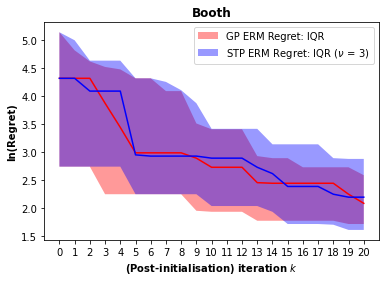

In [ ]:
### Visualise!

title = obj_func

plt.figure()

plt.plot(median_gp, color = 'Red')
plt.plot(median_stp, color = 'Blue')

xstar = np.arange(0, max_iter+1, step=1)
plt.fill_between(xstar, lower_gp, upper_gp, facecolor = 'Red', alpha=0.4, label='GP ERM Regret: IQR')
plt.fill_between(xstar, lower_stp, upper_stp, facecolor = 'Blue', alpha=0.4, label='STP ERM Regret: IQR ' r'($\nu$' ' = {})'.format(df))

plt.title(title, weight = 'bold', family = 'Arial')
plt.xlabel('(Post-initialisation) iteration $\it{k}$', weight = 'bold') # x-axis label
plt.ylabel('ln(Regret)', weight = 'bold') # y-axis label
plt.legend(loc=0) # add plot legend

### Make the x-ticks integers, not floats:
count = len(xstar)
plt.xticks(np.arange(count), np.arange(0, count))
plt.show() #visualise!
